# Exploratory Data Analysis (EDA) of Textual Data
Performing initial data investigation is the first step in every data science project. Looking at data would help us to comprehend its structure, discover patterns and to evaluate data quality.

This is a starter notebook for NLP in text processing. It will show you how to summarize and visualize your textual data to gain valuable intuition and understanding of your NLP project. It covers Text Preprocessing and Analysis in comprehensive details. 

- The notebook is inspired by this **amazing book** [Blueprints for Text Analytics Using Python: Machine Learning-Based Solutions for Common Real World (NLP) Applications](https://www.amazon.de/Blueprints-Text-Analytics-using-Python/dp/149207408X) by *Sidharth Ramachandran, Jens Albrecht, and Christian Winkler*. The authors explain the fundamentals of NLP, while also putting it directly into practice. Code examples are available in the [Github repository](https://github.com/blueprints-for-text-analytics-python/blueprints-text).

- Other valuable references used in this notebook are: 
    - [Practical Statistics for Data Scientists: 50+ Essential Concepts Using R and Python](https://www.amazon.de/Practical-Statistics-Data-Scientists-Essential/dp/149207294X)
    - [Python for Data Analysis: Data Wrangling with Pandas, NumPy, and IPython](https://www.amazon.de/Python-Data-Analysis-Wrangling-IPython/dp/1491957662)


**Please upvote and share the notebook if you found it helpful in any way** 🔥. Thank you in advance!

# UN General Debate Corpus

## Context:
Every year since 1947, representatives of UN member states gather at the annual sessions of the United Nations General Assembly. The centrepiece of each session is the General Debate. This is a forum at which leaders and other senior officials deliver statements that present their government’s perspective on the major issues in world politics. These statements are akin to the annual legislative state-of-the-union addresses in domestic politics. This dataset, the UN General Debate Corpus (UNGDC), includes the corpus of texts of General Debate statements from 1970 (Session 25) to 2016 (Session 71).

In this note book we will work with the *UN General Debate dataset*. The ***corpus*** includes the text of each country’s statement from the general debate, separated by country, session and year and tagged for each. The text was scanned from PDFs of transcripts of the UN general sessions. As a result, the original scans included page numbers in the text from OCR (Optical character recognition) scans, which have been removed. This dataset only includes English.

---
* *Corpus*: is a dataset consiting of text documents such as news, tweets, emails, or service calls. In this notebook, we will use the terms *corpus* and *dataset* interchangeably.

In [1]:
# install textacy
!pip install textacy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.4/200.4 kB 446.7 kB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.6/132.6 kB 2.0 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 7.7 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 42.7 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 458.8/458.8 kB 18.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 821.9/821.9 kB 36.9 MB/s eta 0:00:00
  Created wheel for jellyfish: filename=jellyfish-0.9.0-cp37-cp37m-linux_x86_64.whl size=102031 sha256=9b098a950cb1babb8785b0120c70426fb575cc83b37d596cd9eee38e3e34ba69
  Stored in directory: /root/.cache/pip/wheels/fe/99/4e/646ce766df0d070b0ef04db27aa11543e2767fda3075aec31b
Successfully built jellyfish
  Attempting uninstall: catalogue
    Found existing installation: catalogue 1.0.0
    Uninstalling catalogue-1.0.0:
      Successfully unins

In [2]:
# import libraries 
import pandas as pd
pd.set_option('display.max_colwidth', 200)
pd.options.mode.chained_assignment = None

# visualization using plotly
pd.options.plotting.backend = "plotly"
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

%matplotlib inline
import numpy as np

In [3]:
# read the dataset into a pandas dataframe
df = pd.read_csv("../input/nlpprojects/un-general-debates.csv")

df.head()

session  year country country_name             speaker position  \
0       25  1970     ALB      Albania             Mr. NAS      NaN   
1       25  1970     ARG    Argentina  Mr. DE PABLO PARDO      NaN   
2       25  1970     AUS    Australia         Mr. McMAHON      NaN   
3       25  1970     AUT      Austria  Mr. KIRCHSCHLAEGER      NaN   
4       25  1970     BEL      Belgium          Mr. HARMEL      NaN   

                                                                                                                                                                                                      text  
0  33: May I first convey to our President the congratulations of the Albanian delegation on his election to the Presidency of the twenty-fifth session of the General Assembly?\n34.\tIn taking up the...  
1  177.\t : It is a fortunate coincidence that precisely at a time when the United Nations is celebrating its first twenty-five years of existence, an eminent jurist so closely linked to our Organiza...  
2  100.\t  It is a pleasure for me to extend to you, Mr. President, the warmest congratulations of the Australia Government and its delegation to this General Assembly on your election to the Preside...  
3  155.\t  May I begin by expressing to Ambassador Hambro, on behalf of the delegation of Austria, our best wishes on his election as President of this General Assembly.\n156.\tWe derive great satisf...  
4  176. No doubt each of us, before coming up to this rostrum, wonders about the usefulness or futility of the speech. Must we still speak when our voices are drowned out by the mournful cries of so ...

From the table above, we can see that the dataset includes the following columns:
- `session`: the UN session. There is one session per year, and the data in this dataset ranges from session 25 to session 71.
- `year`: The year of the session, from 25 to 71
- `country`: The representative’s country, as an ISO 3166 Alpha-3 country code
- `country_name`: The name of the country
- `speaker`: The name of the speaker
- `position`: The position of the speaker. 
- `text`: The complete text of that country’s statement in the general debate from that year, with OCR page numbers removed. Note that the text is not fully displayed.

## Large dataset? Take a sample, Develop your code, and Rerun! 

If you have a large dataset, start with a subset of the original dataset using Pandas `sample` function or use `pd.read_csv` parameters such as `nrows`. This allows to develop your code and visualizations quickly and avoid performance problems. Once you are done, you can rerun your code on the large dataset to get the full insight.

In [4]:
# return a subset from the original corpus
df_subset = df.sample(frac = 0.05)
df_subset.head(2)

session  year country country_name          speaker  \
5020       58  2003     ARM      Armenia  Vartan Oskanian   
2161       41  1986     DJI     Djibouti  Mr. FARAH DIRIR   

                          position  \
5020  Minister for Foreign Affairs   
2161                           NaN   

                                                                                                                                                                                                         text  
5020  ﻿We thank Jan Kavan\nfor his work, and we welcome Mr. Julian Hunte in the\ndifficult year that awaits him.\nAt the beginning of this millennium, a summit of\nthe world's leaders produced a set of ...  
2161  I an very pleased to congratulate you most sincerely. Sir, on your election as President of the forty-first session of the General Assembly. Your well-deserved election to this high post, while a ...

## Get the first impression of your dataset

Before starting the *real* analysis, let's gather some information about the structure of our dataset:

### Calculate summary statistics for our columns

In [5]:
# add new column to calculate the length of each speech
df['length'] = df['text'].str.len()

# compute the summary statistics for the columns
df.describe().T

count          mean          std     min      25%      50%      75%  \
session  7507.0     49.610763    12.892155    25.0     39.0     51.0     61.0   
year     7507.0   1994.610763    12.892155  1970.0   1984.0   1996.0   2006.0   
length   7507.0  17967.281604  7860.038463  2362.0  12077.0  16424.0  22479.5   

             max  
session     70.0  
year      2015.0  
length   72041.0

The dataset contains 7507 row for each column. For columns `year` and `session` the mean and standard deviation dont provide any useful information. However, the minimum and maximum values are still intresting! The data in this dataset ranges from session 25 to session 71 and spanes from year 1970 to 2015.

Ok, we have a summary statistics for our numerical columns. What about **nunnumerical** ones? To create a summary for **nunnumerical** columns we add the parameter `include='O'` (refers to `np.object`) to show the count, the number of unique values, the top-most element, and its frequency.

In [6]:
df[["country", "country_name","speaker"]].describe(include="O").T

count unique            top freq
country       7507    199            ALB   46
country_name  7507    199        Albania   46
speaker       7480   5428  Seyoum Mesfin   12

The table above shows that there are 199 unique countries and 5428 unique speakers (we will check this in the next section). *Albania* and Ethiopia's minister of foreign affairs *Seyoum Mesfin* are the most frequent elements with 46 and 12 entries respectively. 

### Check for Missing Values
By looking at the first values in the `position` column we remark that it has some missing values. The missing data are represented as floating-point value Not a Number `NaN` (aka sentinel value). We can check missing values in our dataset as follows:

In [7]:
# show the number of NaN in each column
df.isnull().sum()

session            0
year               0
country            0
country_name       0
speaker           27
position        3005
text               0
length             0
dtype: int64

The table above shows that the information in the `speaker` and `position` columns are **not** always available! There are 3 methods for handling missing data:
1. Drop rows/columns containing `NaN` values using `df.dropna()` 
2. Fill in missing data using `df.fillna()`
3. Flag rows contining missing data

We are going to substitute the missing values in these two columns using other values such as `unknown` or `empty`:

In [8]:
# fill in missing values in the columns speaker and position
# fillna returns a new object, but you can modify the existing object inplace (so be careful :) )
df["speaker"].fillna("unkown", inplace=True)
df["position"].fillna("unkown", inplace=True)

For more detailed information about handling missing values check the following sources: 
* [Python for Data Analysis](https://www.amazon.com/Python-Data-Analysis-Wrangling-IPython-ebook/dp/B075X4LT6K) *p.193 - 195*
* The great data cleaning challenge notebooks by Rachael Tatman [Data Cleaning Challenge: Handling missing values](https://www.kaggle.com/code/rtatman/data-cleaning-challenge-handling-missing-values/notebook)
---

### Deal with inconsistent values
Missing data might not be the only problem. The same speaker's name can be entered in many different ways. For example, the president of the United States from 2001 to 2009 *George W. Bush* is spelled differently in the dataset or even abmbiguously (*Bush*).

In [9]:
# show the number of records containing Bush in speaker column (case insensitive)
df[df["speaker"].str.contains("Bush", case=False)]["speaker"].value_counts()

George W. Bush        4
Mr. George W. Bush    2
Bush                  1
GEORGE BUSH           1
George Bush           1
Mr. George BUSH       1
Mr. George W Bush     1
Name: speaker, dtype: int64

Without resolving such ambiguities in `speaker` column, any analysis on speaker names would produce unreliable results. 

In [10]:
# check records contining Bush in speaker column (case insensitive)
df[df["speaker"].str.contains("bush", case=False)]["speaker"]

2720                  Bush
2876           GEORGE BUSH
3038           George Bush
3207       Mr. George BUSH
4814        George W. Bush
5002    Mr. George W. Bush
5191        George W. Bush
5382     Mr. George W Bush
5760    Mr. George W. Bush
5951        George W. Bush
6143        George W. Bush
Name: speaker, dtype: object

I Know, this example is a little bit tricky because ***George W. Bush*** is son of former president ***George H. W. Bush*** 😄 (aka George Bush). That is, we should differentiate between the father and the son! We will do that based on `year` column. We can do that using `str.contains` to mask the rows that contain 'bush' (and the year less than 2001) and then overwrite with the new value.

In [11]:
# replace the whole string that contain W. Bush to be George W. Bush
df.loc[df["speaker"].str.contains('w. bush', case=False), "speaker"] = "Son: George W. Bush"

# replace the whole string that contain only Bush to be George H. W. Bush
df.loc[((df["speaker"].str.contains('bush', case=False)) & (df["year"] < 2001)), "speaker"] = "Father: George H. W. Bush"

In [12]:
# check the result now
df[df["speaker"].str.contains("bush", case=False)]["speaker"]

2720    Father: George H. W. Bush
2876    Father: George H. W. Bush
3038    Father: George H. W. Bush
3207    Father: George H. W. Bush
4814          Son: George W. Bush
5002          Son: George W. Bush
5191          Son: George W. Bush
5382            Mr. George W Bush
5760          Son: George W. Bush
5951          Son: George W. Bush
6143          Son: George W. Bush
Name: speaker, dtype: object

### Explore the Data Distribution

> A **boxplot**- with the top and bottom of the box at the 75th and 25th percentiles, respectively-also gives a quick sense of the distribution of the data, it is often used in side-by-side displays to compare distributions. 

\- [Practical Statistics for Data Science: 50+ Essential Concepts Using R and Python](https://www.amazon.de/Practical-Statistics-Data-Scientists-Essential/dp/149207294X) *p. 26*

To visualize the distribution of text lengths, we will use a boxplot. **Note**: We will change pandas plotting backend to get interactive `plotly` using plotly backend instead of matplotlib static plots. 

In [13]:
# change the pandas plotting backend for the whole session
pd.options.plotting.backend = "plotly"

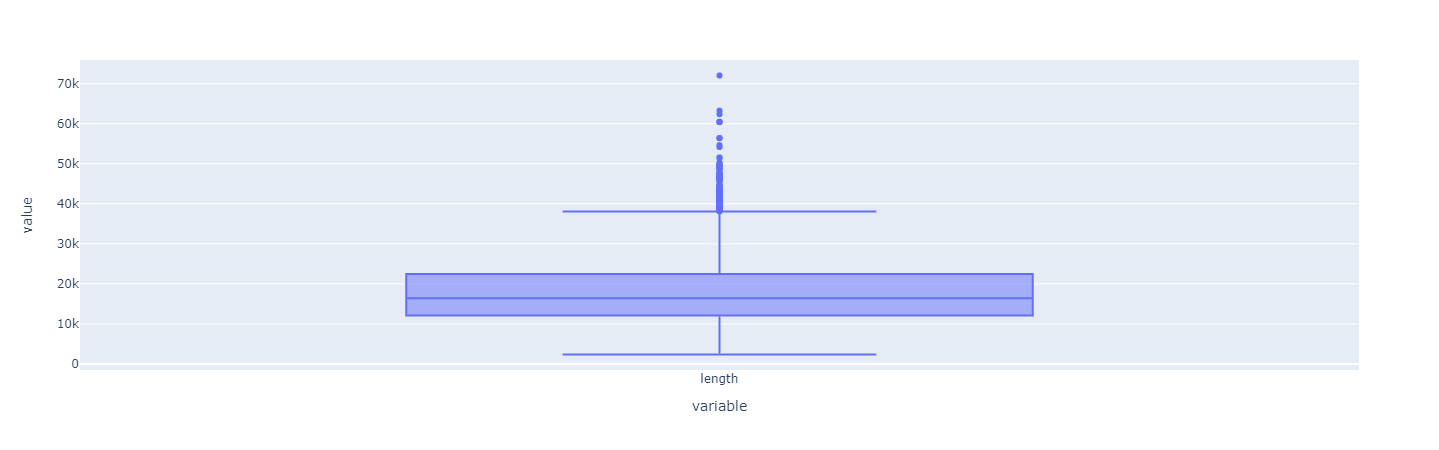

In [14]:
# show the boxplot for the length column
df["length"].plot(kind="box")

What can be clearly see in this boxplot, half of the speeches (the box in the middle) fall between roughly 12000 and 22000 characters. The top and bottom of the box are the **75th** and **25th percentiles**, respectively. In other words, 25% of the speeches have 12077 characters or less.  The **midian** is shown by the horizontal line in the box with 16424 characters. The line extend from the top and bottom of the box are the **whiskers** that indicate the range for the bulk of the data. Any data outside of the whiskers is plotted as single points or circles referred to as **outliers**.

To get more details, we will use a histogram to take a sense of the distribution of the speeches' lenghts at a glance. In the following histogram, the value range of the `length` column is divided into **bins** (intervals with the same width). The *y-axis* shows the number of documents falling into each of these bins. For example, there are 253 speeches/documents that have between 13000 and 13499 characters.

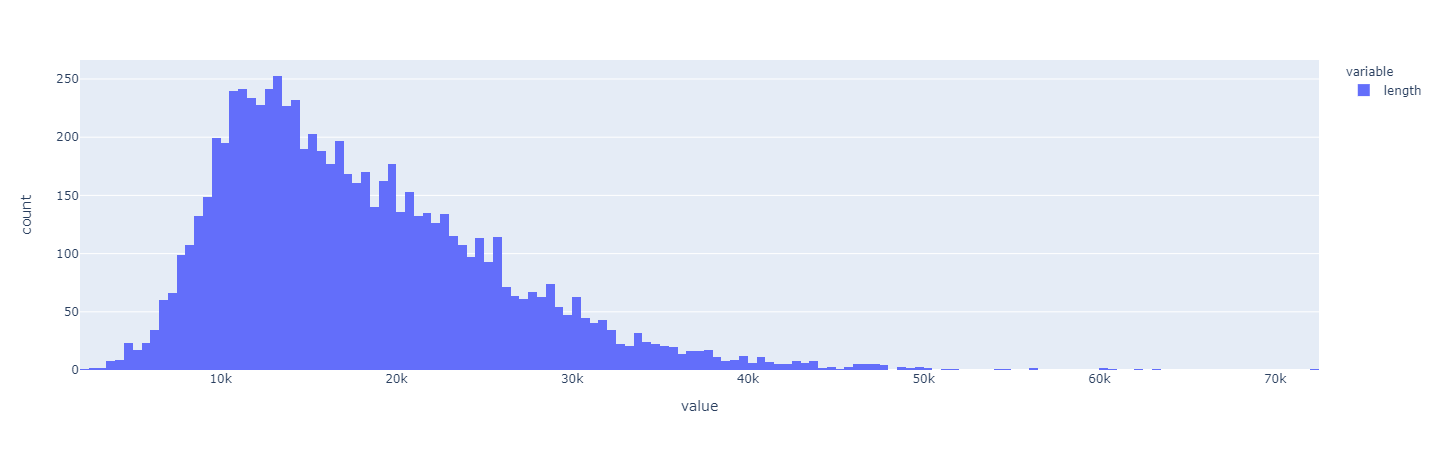

In [15]:
# show the histogram for the length column
df["length"].plot(kind="hist", bins=30)

### Comparing Value Distributions Across Categories
Let's compare the distributions of the speech length of five UN members. We will use `plotly.graph_objects` module to create and manipulate graphical figures. 

---
Check `plotly` documentation to learn more about how to create and update figures: 
* [Creating and updating figures](https://plotly.com/python/creating-and-updating-figures/#figures-as-graph-objects).
* [Plotly API Reference](https://plotly.com/python-api-reference/)
* [update_layout() method](https://plotly.com/python/reference/layout/#layout-title)

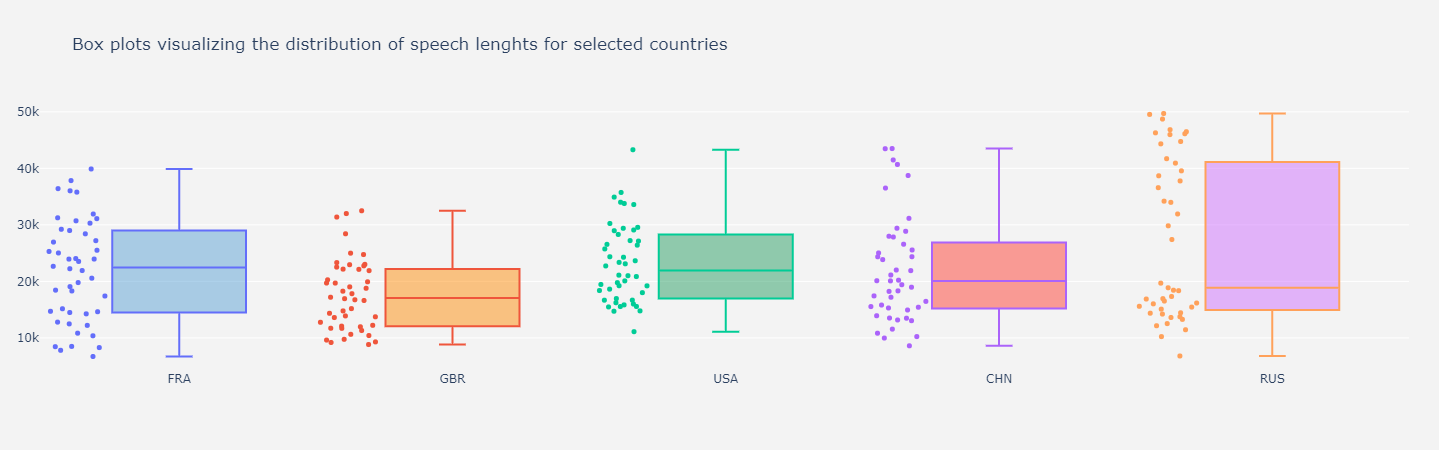

In [16]:
# select a subset of countries
x_data = ['FRA', 'GBR', 'USA', 'CHN', 'RUS']

# find the speech length for each country
y_data = [df[df["country"] == country_id]["length"].to_numpy() for country_id in x_data]

# choose colors for your plot
colors = ['rgba(93, 164, 214, 0.5)', 'rgba(255, 144, 14, 0.5)', 'rgba(44, 160, 101, 0.5)',
          'rgba(255, 65, 54, 0.5)', 'rgba(207, 114, 255, 0.5)']

# create figure instance
fig = go.Figure()

for xd, yd, cls in zip(x_data, y_data, colors):
    # each trace will capture the values for a country
        fig.add_trace(go.Box(
            y=yd,
            name=xd,          # Sets the trace name
            boxpoints='all',  # All sample points are shown
            jitter=0.5,       # Sets the amount of jitter in the sample points drawn
            whiskerwidth=0.2, # Sets the width of the whiskers relative to the box’ width
            fillcolor=cls,
            marker_size=5,
            line_width=2)
        )

# we use update_layout() method to update multiple nested nested properties of a figure's layout
fig.update_layout(
    title='Box plots visualizing the distribution of speech lenghts for selected countries',
    margin=dict( # set margins for left, right, bottom, and top
        l=40,
        r=30,
        b=80,
        t=100,
    ),
    paper_bgcolor='rgb(243, 243, 243)', # Sets the background color of the paper where the graph is drawn
    plot_bgcolor='rgb(243, 243, 243)',  # Sets the background color of the plotting area in-between x and y axes
    showlegend=False,
)

fig.show()

**Violin Plot** is an enhancement to the boxplot as it can show nuances in the distribution that aren't preceptible in a boxplot. We can combine a violin plot with a boxplot by adding `box_visible=True` when adding or updating the trace.

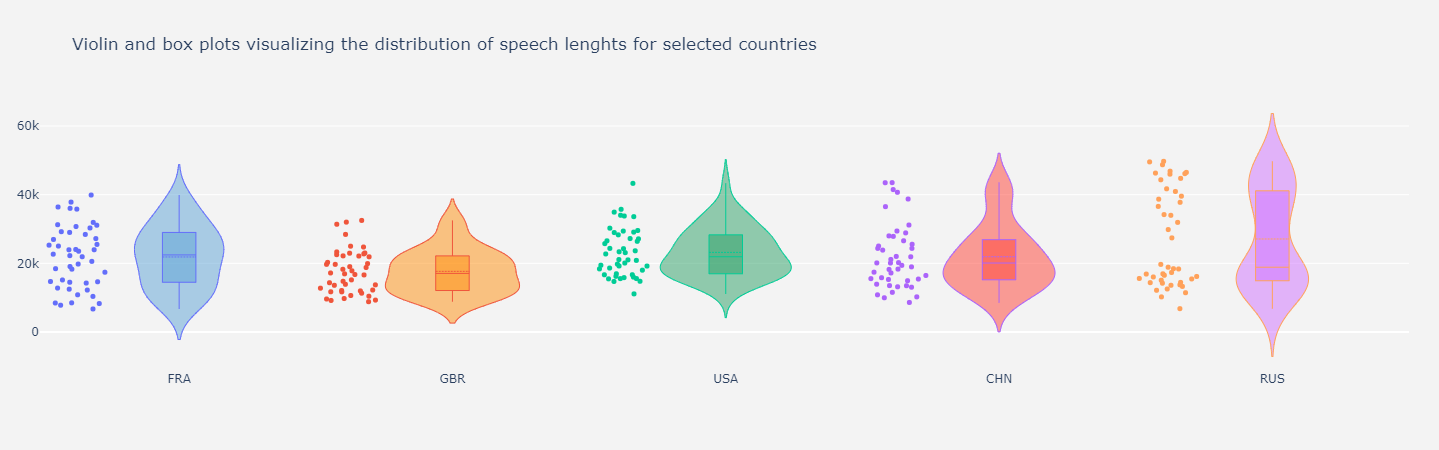

In [17]:
# select a subset of countries
x_data = ['FRA', 'GBR', 'USA', 'CHN', 'RUS']

# find the speech length for each country
y_data = [df[df["country"] == country_id]["length"].to_numpy() for country_id in x_data]

# choose colors for your plot
colors = ['rgba(93, 164, 214, 0.5)', 'rgba(255, 144, 14, 0.5)', 'rgba(44, 160, 101, 0.5)',
          'rgba(255, 65, 54, 0.5)', 'rgba(207, 114, 255, 0.5)']

fig = go.Figure()

for xd, yd, cls in zip(x_data, y_data, colors):
        fig.add_trace(go.Violin(
            y=yd,
            name=xd,
            legendgroup = "F",
            jitter=0.5,
            scalegroup = "M",
            fillcolor=cls,
            marker_size=5,
            line_width=1,
            box_visible=True)
        )

fig.update_layout(
    title='Violin and box plots visualizing the distribution of speech lenghts for selected countries',
    margin=dict(
        l=40,
        r=30,
        b=80,
        t=100,
    ),
    paper_bgcolor='rgb(243, 243, 243)',
    plot_bgcolor='rgb(243, 243, 243)',
    showlegend=False
)        
        
fig.update_traces(#box_visible=True, 
                  meanline_visible=True, 
                  points = "all")


fig.show()

Both plots show that the despresion of speech lengths for Russia is musch larger than other countries. 

### Visualizing Developments Over Time
Since our dataset contains time element, it is worth visulizing some trends over the time. For example, let's see how the number of speeches changed between 1970 and 2015. We will use `groubpy("column_name")` method. `.groupby` splits the data based on condition/column into groups (based on the column `year` in our case) then count the rows (i.e., speechs) in each group.

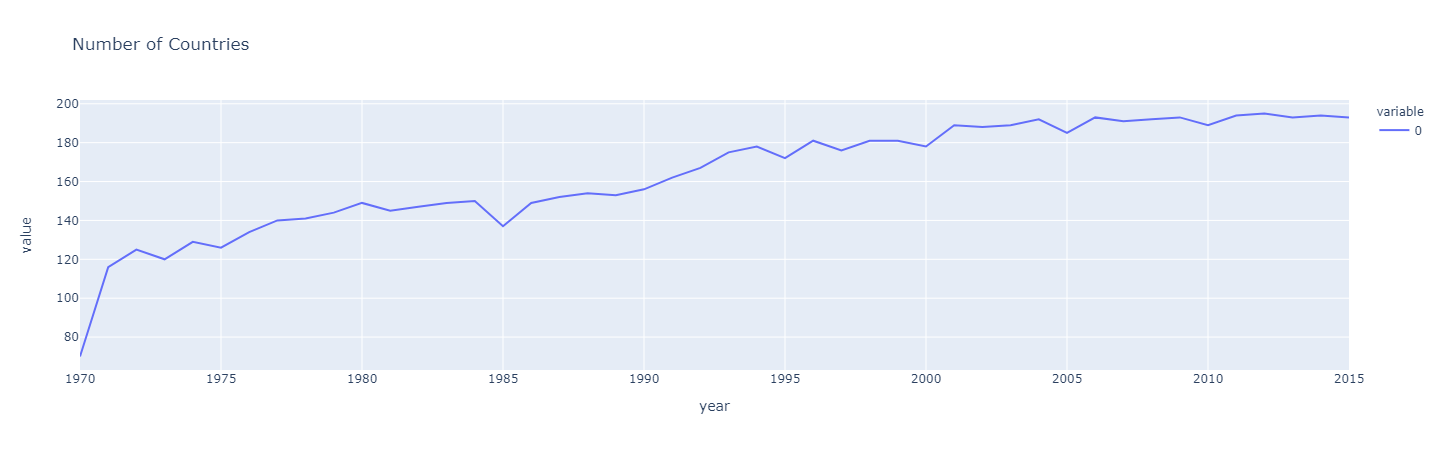

In [18]:
df.groupby("year").size().plot(title="Number of Countries", kind="line")

Why the number of speeches is increased although each country is eligible to give only one speech per year 😅! Thats correct! The trend reflects the development of the number of UN council members. Nowdays, the UN is made up of 193 Member States.  

> We can also use some available functions that we can apply to the **groups** before combining them to a final result. You can use those functions as follows:
> - ``group = df.groupby('GROUP')`` and then:
    - ``group.apply(mean)``
    - ``group.agg(mean)``
    - ``group['INTERSTING COLUMN'].apply(mean)``
    - ``group.agg({'INTERSTING COLUMN':mean})``
    - ``group.mean()``
    - **NOTE**: `mean` could be also be another function.

Let's check the average speech length over time:

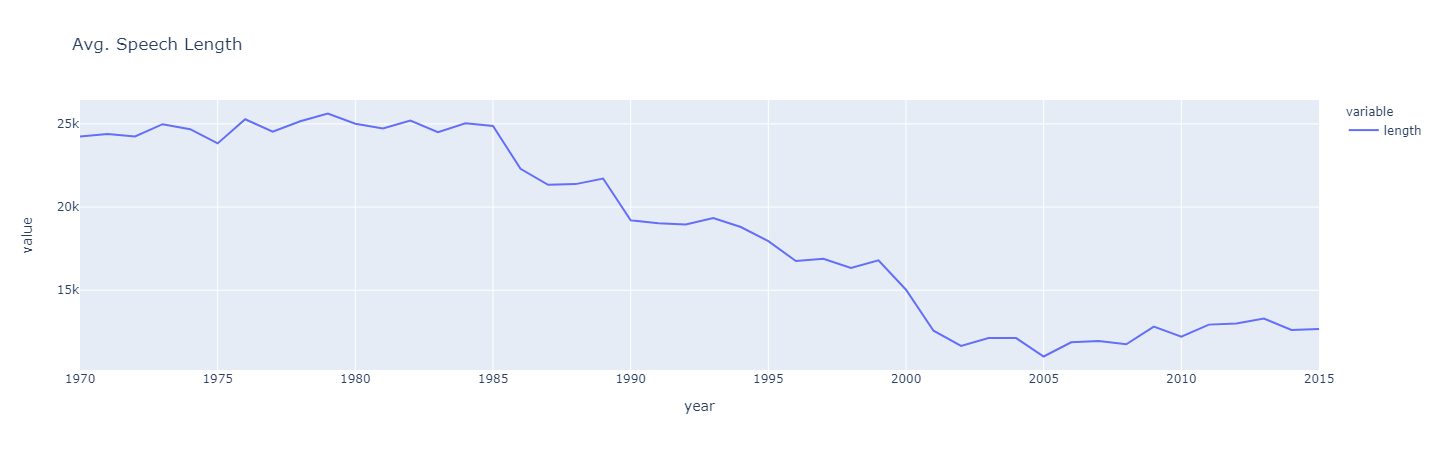

In [19]:
# group by year
year_group = df.groupby("year")

# calculate the average of speech lengths for each group and visualize
year_group.agg({"length":"mean"}).plot(title="Avg. Speech Length")

What is interesting in this plot is the rapid decrease in average speech length after the year 1985!

## Build a Text Preprocessing Pipeline
* Our previous analysis has already provided the first insights on the dataset. However, the analysis of the dataset would be more interesting when going deeper into the actual content and find frequent words in different time periods. To do that, we have to prepare our text in a several different steps. Each step provides the output for the next one, such sequence of processing steps is referred to as **processing pipeline**. Our pipline will transform the source text into prepared tokens. In addition, it should remove the disturbing noise to facilitate detecting patterns in our data. Some examples of noise are *HTML tags* (e.g., `<!DOCTYPE>` or `<body>`)  , *special characters* (e.g., `%#!`), and *stop words* (e.g., `the`, `is`, and `and`). 

### Key notes:
* The **main goal** of any text preprocessing pipeline is to create a **prepared dataset** for analysis or feed it into a machine learning model. 
* However, the requirements for a prepared dataset is **dependent** on the type of NLP task you are working on. If you are working on a sentiment analysis project, you must **NOT** delete valuble information such as stop words or special characters. Look at the following example: 
    * `I didn't like the end of Game of Thrones!!!` If you remove stop words and special characters, you will lose `didn't` and `!!!` altough both are important modifiers that change the orientation and modify the intensity of sentiment term `like`. 
* We will discuss different steps of text preprocessing. Choose the suitable ones for your project.
* Our pipeline consists of **two building blocks**: Data Cleaning and Linguistic Preprocessing

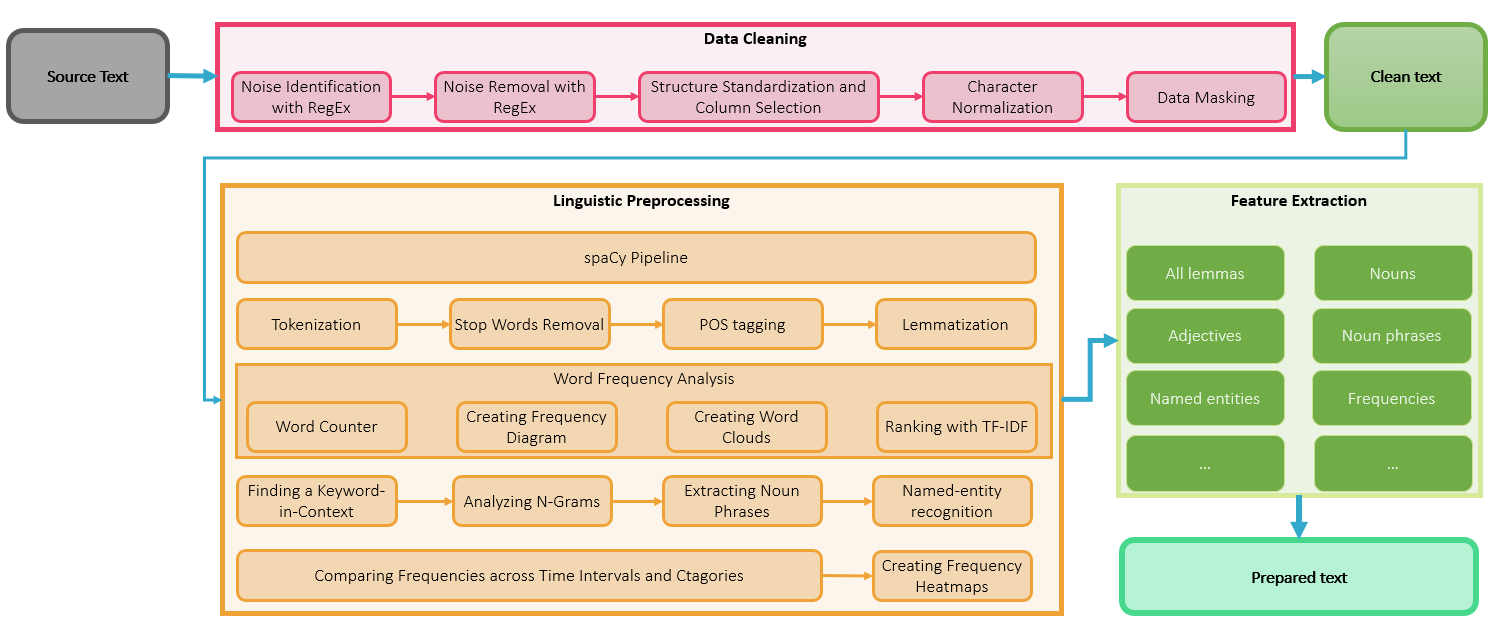

### Data Cleaning:
In order to create a **prepared dataset** we have to clean our text. The first step in data cleaning is to remove unwanted characters. That is, delete all tags, HTML entities, and special characters. Here is where regular expressions can help.

> **Regular Expression or RegEx** is a string containing a combination of normal characters and special metacharacters that describes patters to find text or positions within a text. 

\- Python has `re` module for RegEx. You can use RegEx in different cases, For example:
* Search for *8 characters* followed by *4 digits* in the specified string: `re.search(r"\w{8}\d{4}", "We should avoid passwords like johnsmith1234")`
* Find `@` followed by *one or more characters*, followed by *0 or more non-characters*, followed by *one or more characters* in the specified string: `re.findall(r"@\w+\W*\w+", "The show is amazing! @ahmad!a @sam&&n @mary9")`
* Find the string `www` followed by *one or more of any character*, followed by the *string* `de`: `re.findall(r"www.+de", "Click on this link: www.porthut.de. It has breathtaking videos!!!")`
* Find  a pattern contains *any lowercase or uppercase letters* followed by *a digit* in the specified string: `re.findall(r"[a-zA-Z]+\d", " Your notebook is upvoted by Ahmad8 and John5")`
---
* If you want to learn more about RegEx and the meaning of metachracters check the following sources:
    * [An overview about available metacharacters](https://www.w3schools.com/python/python_regex.asp)
    + [Great tool to illustrate any RegEx](https://regexper.com/)
    * [Interactive website to develop and test RegEx](https://regex101.com/)
    

#### Identify noise with RegEx:
We will a function that uses RegEx to identify the rate of **noise** (i.e., not plain text) in a specific text. Such noise affects the quality of our data.

---
* For more examples, check the repository of [Blueprints for Text Analytics Using Python](https://colab.research.google.com/github/blueprints-for-text-analytics-python/blueprints-text/blob/master/ch04/Data_Preparation.ipynb#scrollTo=CTyZaP9XOopI). A detailed explaination of the examples is available in the [book](https://www.amazon.de/Blueprints-Text-Analytics-using-Python/dp/149207408X)

In [20]:
import re

# define a precompiled regular expression
RE_SUSPICIOUS = re.compile(r'[&#<>{}\[\]\\]')

def impurity(text, min_len=10):
    """
    Returns the share of suspicious characters in a text.
    Very short texts (less than min_len) are ignored.
    """
    if text == None or len(text) < min_len:
        return 0
    else:
        return len(RE_SUSPICIOUS.findall(text))/len(text)

Our precompiled RegEx will calculate the share of the illustrated characters in the text:

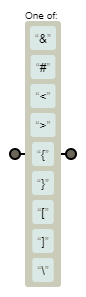

In [21]:
# an example text with noise and non-English characters
text_1 = """
After viewing the [PINKIEPOOL Trailer](https://www.youtu.be/watch?v=ieHRoHUg)
it got me thinking about the best match ups.
<lb>Here's my take:<lb><lb>[](/sp)[](/ppseesyou) Deadpool<lb>[](/sp)[](/ajsly)
Captain America<lb>.
朱惠英 
Привет, мир 
こんにちは世界"""

print(f"About {impurity(text_1)*100:.4f}% of characters are suspicious", )

About 8.0321% of characters are suspicious


The `impurity()` function has identified the following characters as "suspicious".

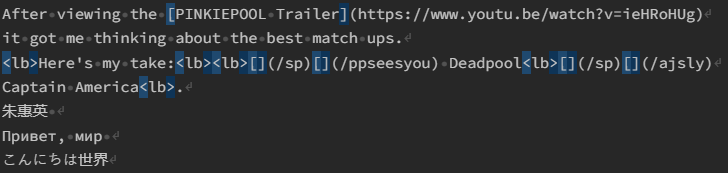

In [22]:
# an example with text length < 10
text_2 = "<h>py<\h>"

print(f"About {impurity(text_2)*100:.6f}% of characters are suspicious", )

About 0.000000% of characters are suspicious


Let's add a new column in our dataset to calculate the share of suspicious characters in the `text` column. We will use Pandas `apply()` function, which allows applying functions along a row or a cloumn.
It is worth to mention that `apply()` function allows us to pass additional parameters of the applied function (in this case `min_lin` of `impurity()` function)

In [23]:
# add new column to dataframe
df["impurity"] = df["text"].apply(impurity, min_len=10)

# get the top 3 records
df[['text', 'impurity']].sort_values(by='impurity', ascending=False).head(3)

text  \
599    Sir, I have the honor to congratulate you on behalf of the Finnish Government on your important election to the presidency. We greet you as an eminent European statesman who has contributed much ...   
2319  ﻿My delegation warmly congratulates you, Sir, on your election to the presidency of the forty-second session of the General Assembly. Our thanks and compliments go to your predecessor, Mr. Humayun...   
286   Mr. President, at the outset I wish to congratulate you on your assumption of the stewardship of this session of the Assembly, a responsibility upon which you have embarked with tact and dynamism....   

      impurity  
599   0.001705  
2319  0.001377  
286   0.001294

#### Noise removal with RegEx:
To clean text data we will apply a set of RegEx to convert problematic patterns into characters or spaces. In addition, it will remove any non-English characters. If you want to test the RegEx on a specific text or develop your own RegEx, check this [Online Tool](https://regex101.com/).

In [24]:
# define noise removal function
import html

# define clean function
# add / remove any line if necessary
def clean(text):
    # convert html escapes like &amp; by their plain-text representation
    text = html.unescape(text) 
    
    # subsitute tags like <tab> by spaces in the specified text
    text = re.sub(r'<[^<>]*>', ' ', text)
    
    # subsitute markdown URLs like [Some text](https://....)
    text = re.sub(r'\[([^\[\]]*)\]\([^\(\)]*\)', r'\1', text)
    
    # subsitute text or code in brackets like [0]
    text = re.sub(r'\[[^\[\]]*\]', ' ', text)
    
    # subsitute standalone sequences of specials, matches &# but not #cool
    text = re.sub(r'(?:^|\s)[&#<>{}\[\]+|\\:-]{1,}(?:\s|$)', ' ', text)
    
    # subsitute standalone sequences of hyphens like --- or ==
    text = re.sub(r'(?:^|\s)[\-=\+]{2,}(?:\s|$)', ' ', text)
    
    # remove non-English letters
    text = re.sub(r'[^\x00-\x7f]',r'', text) # only for this dataset -> remove line
    
    text = re.sub(r'\\n|\\t|\\r', ' ', text) # only for this dataset -> remove line
    
    # sequences of white spaces
    text = re.sub(r'\s+', ' ', text)
    
    
    return text.strip()

We can apply clean function on a sample text:

In [25]:

text_1 = """
After viewing the [PINKIEPOOL Trailer](https://www.youtu.be/watch?v=ieHRoHUg)
it got me thinking about the best match ups.
<lb>Here's my take:<lb><lb>[](/sp)[](/ppseesyou) Deadpool<lb>[](/sp)[](/ajsly)
Captain America<lb>.
朱惠英 
Привет, мир 
こんにちは世界"""

# apply clean function and save the result
clean_text_1 = clean(text_1)
print(clean_text_1)

# check the share of suspicious characters
print(f"\nAbout {impurity(clean_text_1)*100:.4f}% of characters are suspicious", )

After viewing the PINKIEPOOL Trailer it got me thinking about the best match ups. Here's my take: Deadpool Captain America . ,

About 0.0000% of characters are suspicious


So, `clean()` function works great! We have a relatively clean text now! You can add **further cleaning steps** if necessary. For example, add the following line to `clean()` in order to remove the punctuations:

In [26]:
text = re.sub(r'[.,]','', clean_text_1)
print(text)

After viewing the PINKIEPOOL Trailer it got me thinking about the best match ups Here's my take: Deadpool Captain America  


How to apply `clean()` function on a dataframe? Since our original dataset is pretty clean, we will use Reddit [Self-Posts](https://www.kaggle.com/datasets/mswarbrickjones/reddit-selfposts) dataset for better illustration. 


> **About the dataset**: The main dataset consists of two files:`rspct.tsv` (tap separated file, contains title and content of self-posts along with the subreddit they came from) and `subreddit_info.csv`  (contains meta data for the subreddits). Both files will be loaded and joined into a single dataframe


In [27]:
# read the data set into a dataframe

# posts
posts_df = pd.read_csv("../input/d/mswarbrickjones/reddit-selfposts/rspct.tsv", sep='\t')
# metadata
subred_df = pd.read_csv("../input/d/mswarbrickjones/reddit-selfposts/subreddit_info.csv").set_index(['subreddit'])
# join both files into a single dataframe
data = posts_df.join(subred_df, on='subreddit')

# check column names
data.columns

Index(['id', 'subreddit', 'title', 'selftext', 'category_1', 'category_2',
       'category_3', 'in_data', 'reason_for_exclusion'],
      dtype='object')

#### Standardize Column Names

In [28]:
# define column_mapping dictionary for column renaming and selection
column_mapping = {
    "id":"id",
    "subreddit":"subredit",
    "title":"title",
    "selftext":"text",           # changed
    "category_1":"category",
    "category_2":"subcategory",
    "category_3": None,          # drop this column
    "in_data":None,              # drop this column
    "reason_for_exclusion": None # drop this column
}

# create a list of remaining columns
remain_cols = [col for col in column_mapping.keys() if column_mapping[col] != None] 

# select the remaining columns and change their names based on defined mapping
df_reddit = data[remain_cols].rename(columns = column_mapping)

In [29]:
# choose autos category
df_reddit = df_reddit[df_reddit["category"] == "autos"]

# show one row
pd.options.display.max_colwidth = None # uncomment to show the entire text

df_reddit.sample(1,random_state=7).T

# pd.options.display.max_colwidth = 200 

727563
id                                                                                                                                                                                                                                                                                                                             7jc2k4
subredit                                                                                                                                                                                                                                                                                                                         volt
title                                                                                                                                                                                                                                                                                                           Dashcam for 2017 volt
text         Hello.<lb>I'm looking into getting a dashcam. <lb>Does anyone have any recommendations? <lb><lb>I'm generally looking for a rechargeable one so that I don't have to route wires down to the cigarette lighter. <lb>Unless there are instructions on how to wire it properly without wires showing. <lb><lb><lb>Thanks! 
category                                                                                                                                                                                                                                                                                                                        autos
subcategory                                                                                                                                                                                                                                                                                                                 chevrolet

As we can see, the text contains some HTML tags `<lb>`. Therefore, it's time to apply our `clean()`. Let's add a new column containing the clean text and check the share of suspicious characters using `impurity()` function defined previously.

In [30]:
# create new column with map function, which accepts our clean function
df_reddit["clean_text"] = df_reddit["text"].map(clean)

# create a new column with impurity BEFORE cleaning
df_reddit["impurity_BC"] = df_reddit["text"].apply(impurity, min_len=10)

# create a new column with impurity AFTER cleaning
df_reddit["impurity_AC"] = df_reddit["clean_text"].apply(impurity, min_len=10)

# show text and impurity score before and after cleaning and sort the values
df_reddit[["text","clean_text", "impurity_BC", "impurity_AC"]].sort_values(by="impurity_BC", ascending=False).head(3)

text  \
997126  Looking at buying a 335i with 39k miles and 11 months left on the CPO warranty. I asked the dealer if the HPFP had been replaced, and for a copy of the service history. He said it had been replaced and provided the service history below. He is saying that the HPFP was replaced in repair order 774680, but isn't the DMTL different than the HPFP, and if the HPFP was also replaced, wouldn't you see it in the order details?<lb><lb>If I can get this HPFP/DMTL issue figured out, what do you think of a 2011 335i w/39k miles, 11 months of CPO and Maintenance for $22k+TTL? It has the Premium and SPort packages, plus the following options:        Heated Front Seats<lb>        harman/kardon Surround Sound System<lb>        Sports Leather Steering Wheel w/Paddle Shifters<lb>        Transmission: 6-Speed STEPTRONIC Automatic<lb>        SIRIUS Satellite Radio<lb><lb>Here's the service history:<lb>ID<lb><tab><lb>Claim<lb>Number<lb><tab><lb>Repair<lb>Order<lb>Number<lb><tab><lb>Repair<lb>Order<lb>Date<lb><tab><lb>Repair<lb>Entry<lb>Date<lb><tab><lb>DAVIS<lb> #<lb><tab><lb>Mileage<lb><tab><tab><lb>Defect Code/Description<lb><tab><lb><tab><tab><tab><lb>40304<lb><tab><lb>01<lb><tab><lb>422970<lb><tab><lb>173659<lb><tab><lb>01/05/2017<lb><tab><lb>01/05/2017<lb><tab><lb>1<lb><tab><lb>37,521<lb><tab><tab><lb>0032350200<lb><tab><lb>Recall 16V071 See Vehicle Comments for information. Recall Fixed<lb><tab><lb><tab><tab><tab><lb>40304<lb><tab><lb>01<lb><tab><lb>403160<lb><tab><lb>169851<lb><tab><lb>11/08/2016<lb><tab><lb>11/16/2016<lb><tab><lb>0<lb><tab><lb>37,494<lb><tab><tab><lb>61610077MP<lb><tab><lb>FT WIPER RUBBER INSERT-MP<lb>85990091MP<lb><tab><lb>OIL SERVICE(MP)AFTER THE 1ST<lb>85990501MP<lb><tab><lb>STANDARD OPERATION MP<lb><tab><lb><tab><tab><tab><lb>42111<lb><tab><lb>01<lb><tab><lb>614430<lb><tab><lb>951915<lb><tab><lb>10/20/2015<lb><tab><lb>10/21/2015<lb><tab><lb>3<lb><tab><lb>31,250<lb><tab><tab><lb>6121001200<lb><tab><lb>Vehicle battery permanent failure<lb><tab><lb><tab><tab><tab><lb>42111<lb><tab><lb>01<lb><tab><lb>565841<lb><tab><lb>943950<lb><tab><lb>08/26/2015<lb><tab><lb>10/13/2015<lb><tab><lb>0<lb><tab><lb>29,901<lb><tab><tab><lb>64310237MP<lb><tab><lb>MICROFILTER REPLACEMENT<lb>85990101MP<lb><tab><lb>VEHICLE CHECK<lb><tab><lb><tab><tab><tab><lb>42111<lb><tab><lb>01<lb><tab><lb>565840<lb><tab><lb>943950<lb><tab><lb>08/26/2015<lb><tab><lb>08/28/2015<lb><tab><lb>0<lb><tab><lb>29,901<lb><tab><tab><lb>61610077MP<lb><tab><lb>FT WIPER RUBBER INSERT-MP<lb>64310237MP<lb><tab><lb>MICROFILTER REPLACEMENT<lb>85990091MP<lb><tab><lb>OIL SERVICE(MP)AFTER THE 1ST<lb>85990101MP<lb><tab><lb>VEHICLE CHECK<lb>85990501MP<lb><tab><lb>STANDARD OPERATION MP<lb><tab><lb><tab><tab><tab><lb>26167<lb><tab><lb>01<lb><tab><lb>71621<lb><tab><lb>426489<lb><tab><lb>02/11/2015<lb><tab><lb>10/13/2015<lb><tab><lb>0<lb><tab><lb>25,774<lb><tab><tab><lb>85990501MP<lb><tab><lb>STANDARD OPERATION MP<lb><tab><lb><tab><tab><tab><lb>26167<lb><tab><lb>01<lb><tab><lb>71630<lb><tab><lb>426489<lb><tab><lb>02/11/2015<lb><tab><lb>02/13/2015<lb><tab><lb>2<lb><tab><lb>25,774<lb><tab><tab><lb>0011270300<lb><tab><lb>B110814: N55 Engine ? Replace VANOS Gear Bolts<lb><tab><lb><tab><tab><tab><lb>26167<lb><tab><lb>01<lb><tab><lb>71620<lb><tab><lb>426489<lb><tab><lb>02/11/2015<lb><tab><lb>02/13/2015<lb><tab><lb>0<lb><tab><lb>25,774<lb><tab><tab><lb>34000077MP<lb><tab><lb>BRAKE FLUID CHANGE- FULL MAINTENANCE PROGRAM<lb>64310237MP<lb><tab><lb>MICROFILTER REPLACEMENT<lb>85100254NA<lb><tab><lb>Vanos Campaign Customer Support Program<lb>85990087MP<lb><tab><lb>MP-LOW MILEAGE ANNUAL OIL SERVICE<lb>85990101MP<lb><tab><lb>VEHICLE CHECK<lb>85990501MP<lb><tab><lb>STANDARD OPERATION MP<lb><tab><lb><tab><tab><tab><lb>26167<lb><tab><lb>01<lb><tab><lb>774680<lb><tab><lb>398493<lb><tab><lb>06/16/2014<lb><tab><lb>06/17/2014<lb><tab><lb>1<lb><tab><lb>18,219<lb><tab><tab><lb>1613051200<lb><tab><lb>**Fuel tank leakage diagnosis module DMTL permanent failure<lb>6131111300**<lb><tab><lb>Switch (

In [31]:
# limit column width
pd.options.display.max_colwidth = 200 

Amazing! As you can see, the records look **cleaner** now 🔥! However, there is always a place for improvement 💭. Turning now to the next step in the cleaning block of our pipeline.

#### Character normalization:
This process focuses on replacing **umlauts** (e.g., *schön*), **accents** (*è, â, î or ô*), **fancy characters/quotation marks** (🅰🅷🅼🅰🅳 🅰🅻🅸🆂🅼🅰🅸🅻) with standard characters according to ASCII encoding format. In addition, words that have been split across lines by a hyphen for visual consistency would be joined. In this step, we will use an NLP library called `textacy`. It's an amazing library with a wide range of functions for preprocessing. 

---
See also:
* [textacy Text Preprocessing Documentation](https://textacy.readthedocs.io/en/0.12.0/api_reference/preprocessing.html)

In [32]:
import textacy
from textacy import preprocessing

# define a normalization function
def normalize(text):
    # join words split by a hyphen or line break
    text = preprocessing.normalize.hyphenated_words(text)
    
    # subsitute fancy quatation marks with an ASCII equivalent
    text = preprocessing.normalize.quotation_marks(text)
    
    # normalize unicode characters in text into canonical forms
    text = preprocessing.normalize.unicode(text)
    
    # remove any accents character in text by replacing them with ASCII equivalents or removing them entirely
    text = preprocessing.remove.accents(text)
    
    return text

In [33]:
# try normalize function on a text with hyphens, fancy, and accented characters
my_text1 = "The ca-\nfé “Saint-Raphaël” is loca-\nted on Côte dʼAzur. Das ist sehr sch-\nön! 𝔄𝔥𝔪𝔞𝔡 𝔄𝔩𝔦𝔰𝔪𝔞𝔦𝔩 𝔦𝔰 𝔞 𝔭𝔞𝔰𝔰𝔦𝔬𝔫𝔞𝔱𝔢 𝔞𝔟𝔬𝔲𝔱 𝔇𝔞𝔱𝔞 𝔖𝔠𝔦𝔢𝔫𝔠𝔢 𝔞𝔫𝔡 𝔐𝔞𝔠𝔥𝔦𝔫𝔢 𝔏𝔢𝔞𝔯𝔫𝔦𝔫𝔤"
print(normalize(my_text1))

The cafe "Saint-Raphael" is located on Cote d'Azur. Das ist sehr schon! Ahmad Alismail is a passionate about Data Science and Machine Learning


#### Data masking
Your dataset might contain sensitive data, such as email addresses or phone numbers. Therefore, you must hide (mask) this information. `textacy` provides a set of functions for data masking. Let's define masking function to hide email addresses, phone numbers, userIDs, and URLs.

In [34]:
import textacy
from textacy import preprocessing

# define masking function
def mask(text):
    
    # replace all email addresses in text with _EmailAddress
    text = preprocessing.replace.emails(text, repl= "_EmailAddress_")
    
    # replace all phone numbers in text with _PhoneNumber_
    text = preprocessing.replace.phone_numbers(text, repl="_PhoneNumber_")
    
    # replace all URLs in text with _URL_
    text = preprocessing.replace.urls(text, repl= "_URL_")
    
    # replace all (Twitter-style) user handles in text with _UserID_
    text = preprocessing.replace.user_handles(text, repl="_UserID_")
    
    return text

In [35]:
# apply masking function on an example
sensitive_txt = """
            Check out https://www.stasi-unterlagen-archiv.de/ . For more information, contact us at 111-222-3333.
            Or send an email to us at 'ahmad.alismail01@gmail.com' or contact @afi1289.
           """
print(mask(sensitive_txt))


            Check out _URL_ . For more information, contact us at _PhoneNumber_.
            Or send an email to us at '_EmailAddress_' or contact _UserID_.
           


Our text has been masked after modifiying sensitive information. Let's apply `normalize()` and `mask()` functions to our dataframe to finalize **data cleaning** block (This process may take about 5 minutes)

In [36]:
# normalize clean_text column
df_reddit["clean_text"] = df_reddit["clean_text"].map(normalize)
# mask sensitive data
df_reddit["clean_text"] = df_reddit["clean_text"].map(mask)

It is worth mentioning that `textacy` allows composing multiple preprocessing steps into a single callable pipeline. Let's define a callable pipeline that takes a text as input, passes it through one or more functions in **sequential order**, then outputs a single (preprocessed) text string. 
> **NOTE:** To specify arguments for individual preprocessors, you can use `functools.partial()`:

In [37]:
from textacy import preprocessing
from functools import partial

# create cleaning pipeline
preproc = preprocessing.make_pipeline(
    
    # join words split by a hyphen or line break
    preprocessing.normalize.hyphenated_words,
    
    # subsitute fancy quatation marks with an ASCII equivalent
    preprocessing.normalize.quotation_marks,
    
    # normalize unicode characters in text into canonical forms
    preprocessing.normalize.unicode,
    
    # remove any accents character in text by replacing them with ASCII equivalents or removing them entirely
    preprocessing.remove.accents,
    
    # replace all (Twitter-style) user handles in text with repl.
    partial(preprocessing.replace.user_handles, repl="TWITTER_USER"),
    
    # Replace all hashtags in text with repl.
    partial(preprocessing.replace.hashtags, repl="_HASTAG_"),
    
    ### TEST ### Enable it only before generating tokens for word clouds
    partial(preprocessing.replace.numbers, repl=""),
    
    # remove HTML tags from text
    preprocessing.remove.html_tags,
    
    # remove text within curly {}, square [], and/or round () brackets
    preprocessing.remove.brackets,

    # replace specific set of punctuation marks with whitespace
    partial(preprocessing.remove.punctuation, only=[ ",", ":", ";", "/" ]),
    
    # Replace all currency symbols in text with repl
    preprocessing.replace.currency_symbols,
    
    # replace all emoji and pictographs in text with repl.
    preprocessing.replace.emojis,
    
 )

In [38]:
# check the functionality of textacy pipeline
my_text1 = "The ca-\nfé “Saint-Raphaël” is loca-\nted on Côte dʼAzur. Das ist sehr sch-\nön! 𝔄𝔥𝔪𝔞𝔡 𝔄𝔩𝔦𝔰𝔪𝔞𝔦𝔩 @𝖆𝖋𝖎1289 𝔦𝔰 𝔞 𝔭𝔞𝔰𝔰𝔦𝔬𝔫𝔞𝔱𝔢 𝔞𝔟𝔬𝔲𝔱 𝔇𝔞𝔱𝔞 𝔖𝔠𝔦𝔢𝔫𝔠𝔢 𝔞𝔫𝔡 𝔐𝔞𝔠𝔥𝔦𝔫𝔢 𝔏𝔢𝔞𝔯𝔫𝔦𝔫𝔤"
my_text2 = "@spacy_io is OSS for <lb><h>industrial-strength</h><lb> NLP in Python developed by @explosion_ai 💥,,,, :; "
my_text3 = "🔥🔥 hacking with my buddy Isaac Mewton #PawProgramming. ::::::;;;;; Worth $ or €"

print(preproc(my_text1))
print("\n",preproc(my_text2))
print("\n",preproc(my_text3))

The cafe "Saint-Raphael" is located on Cote d'Azur. Das ist sehr schon! Ahmad Alismail TWITTER_USER is a passionate about Data Science and Machine Learning

 TWITTER_USER is OSS for industrial-strength NLP in Python developed by TWITTER_USER _EMOJI_   

 _EMOJI__EMOJI_ hacking with my buddy Isaac Mewton _HASTAG_.   Worth _CUR_ or _CUR_


In [39]:
my_test = "in 02/11/2018 based on descision 43/8943"
preproc(my_test)

'in   based on descision  '

In [40]:
# create new column with map function, which accepts our clean function
df_reddit["clean_text_textacy"] = df_reddit["text"].map(preproc)


# create a new column with impurity AFTER textacy preprocessing
df_reddit["impurity_AC_textacy"] = df_reddit["clean_text_textacy"].apply(impurity, min_len=10)

# show text and impurity score before and after cleaning and sort the values
df_reddit[["text","clean_text_textacy", "impurity_BC", "impurity_AC","impurity_AC_textacy"]].sort_values(by="impurity_BC", ascending=False).head(3)


text  \
997126  Looking at buying a 335i with 39k miles and 11 months left on the CPO warranty. I asked the dealer if the HPFP had been replaced, and for a copy of the service history. He said it had been replace...   
626478  I'm looking to lease an a4 premium plus automatic with the nav package.<lb><lb>Vehicle Price:<tab><tab>$49,150.00<tab> <lb> <tab>AutoNation Savings:<tab>-<tab>$3,867.00<tab> <lb> <tab>AutoNation P...   
138199  Breakdown below:<lb><lb>Elantra GT<lb><lb>2.0L 4-cylinder<lb><lb>6-speed Manual Transmission<lb><lb>$19,350<lb><lb>Elantra GT<lb><lb>2.0L 4-cylinder<lb><lb>6-speed Automatic Transmission w/ SHIFTR...   

                                                                                                                                                                                             clean_text_textacy  \
997126  Looking at buying a 335i with 39k miles and  months left on the CPO warranty. I asked the dealer if the HPFP had been replaced  and for a copy of the service history. He said it had been replaced ...   
626478  I'm looking to lease an a4 premium plus automatic with the nav package.Vehicle Price _CUR_  AutoNation Savings -_CUR_  AutoNation Price _CUR_     Sales Tax  +_CUR_  Title Fee +_CUR_  Tire Battery ...   
138199  Breakdown below Elantra GT.0L -cylinder-speed Manual Transmission_CUR_Elantra GT.0L -cylinder-speed Automatic Transmission w  SHIFTRONIC®_CUR_Elantra GT Sport.6L Turbo GDI -cylinder-speed Manual T...   

        impurity_BC  impurity_AC  impurity_AC_textacy  
997126     0.214716          0.0             0.000464  
626478     0.165099          0.0             0.000000  
138199     0.139130          0.0             0.000000

> **NOTE**: Data Cleaning is an iterative process. There's always room for improvement. Stop cleaning when your dataset is **sufficient** clean. As the saying goes: *garbage in, garbage out*. Ensure that you have high-quality data before starting your project because dirty data has an **incremental cost**.

### Linguistic Processing:
The second block in our preprocessing pipeline is linguistic processing, which consists basically of multiple steps: 
1. `Tokenization`: segmenting text into words, punctuations marks etc
2. `Stop Words Removal`: removing most common words of a language that add little or no meaning to the overall sentence, for example “and” or “I”
3. `Part-Of-Speech (POS) tagging`: assigning word types to tokens, like verb or noun
4. `Lemmatization`: assigning the base forms of words. For example, the lemma of “was” is “be”, and the lemma of “rats” is “rat”
5. `Word frequency Analysis`: provide some basic understanding of discussed topics by counting words, creating diagrams, and ranking words.
6. `Advanced Token Analysis`: This step aims to find keywords, analyze n-grams, extract noun phrashes, compare frequencies across time, and create heatmaps etc.
7. `Named-Entity-Recognition (NER)`: labelling named “real-world” objects, like persons, companies or locations

We'll build a linguistic processer with `spaCy`. It's a powerful is library for advanced Natural Language Processing.
> *The philosophy of `spaCy` is that the original text is retained throughout the process. Instead of transforming it,`spaCy` adds layers of information. The **main object** to represent the processed text is a `Doc` object, which iteself contains a list of `Token` objects. Any range selection of tokens creates a `Span`*. Source: [Blueprints for Text analytics using Python p.104](https://www.amazon.de/-/en/Jens-Albrecht/dp/149207408X)

At the center of `spaCy` is the **trained pipeline model** (e.g., `en_core_web_sm`). We can load it via `spacy.load`. This will return a `Language` object containing all components and data needed to process text. We usually call this object `nlp`. 

When you call `nlp` on a text, `spaCy` first **tokenizes** the text to produce a `Doc` object. The `Doc` is then processed in several different steps – this is also referred to as the **processing pipeline**. The pipeline used by the trained pipelines typically include a **tagger**, a **lemmatizer**, a **parser** and an **entity recognizer.** Each pipeline component returns the *processed* `Doc`, which is then passed on to the next component. 

Let's create an `nlp` **object** (that contains the *shared vocabulary*, the *model*, and the *processing pipeline components*) using an English **trained pipeline model/package** `en_core_web_sm`, which is trained on we text and supports all core capabilites:



In [41]:
import spacy
# download best-matching version of specific model for your spaCy installation
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 8.7 MB/s eta 0:00:0000:01m00:01
  Attempting uninstall: en-core-web-sm
    Found existing installation: en-core-web-sm 2.3.1
    Uninstalling en-core-web-sm-2.3.1:
      Successfully uninstalled en-core-web-sm-2.3.1
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [42]:
# load a pipeline package by name and return nlp object
nlp = spacy.load("en_core_web_sm")

# check processing pipeline components of nlp object
nlp.pipeline

[('tok2vec', <spacy.pipeline.tok2vec.Tok2Vec at 0x7f7a6e08b8a0>),
 ('tagger', <spacy.pipeline.tagger.Tagger at 0x7f7a6e08b750>),
 ('parser', <spacy.pipeline.dep_parser.DependencyParser at 0x7f7a6de074d0>),
 ('attribute_ruler',
  <spacy.pipeline.attributeruler.AttributeRuler at 0x7f7a6dd018c0>),
 ('lemmatizer',
  <spacy.lang.en.lemmatizer.EnglishLemmatizer at 0x7f7a6dd09f00>),
 ('ner', <spacy.pipeline.ner.EntityRecognizer at 0x7f7a6de07350>)]

The pipeline components are: vectorizer, tagger, parser, named-entity recognizer, attribute ruler, and lemmatizer. These components are called on the `Doc` object in order. The tokenizer is NOT explicitly listed as it fundamental step, which runs BEFORE all of components. Some components (e.g., `tok2vec`) have been recently introduced in spaCy v3. Check out [spaCy website](https://spacy.io/usage/spacy-101#pipelines) for more information.


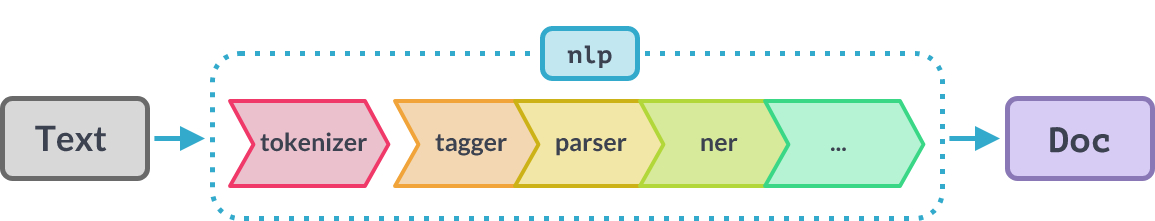

When you process a text with the `nlp` object, `spaCy` creates a `Doc` object – short for "document". The `Doc` lets you access information about the tokens, ranges of tokens (aka spans) and their linguistic annotations. Since `spaCy` is object-oriented no information is lost.

In [43]:
# create a Doc by processing a string of text with the nlp object
doc = nlp("We are learning the basics of text processing with spaCy")

# iterate over tokens in a Doc
for token in doc:
    print(token.text, end=" | ")

We | are | learning | the | basics | of | text | processing | with | spaCy | 

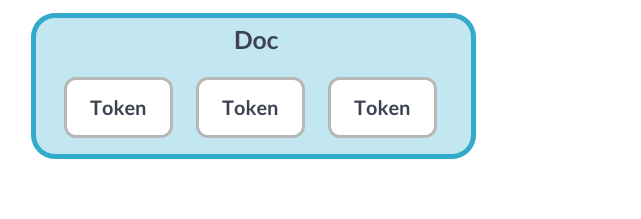

Each tokes represents an object of `spaCy`s class `Token`. To get a token at a specific position, you can index into the `doc`.

In [44]:
# index into the Doc to get a single Token
tok = doc[2]

# get the token text via the .text attribute
print(tok.text)

learning


`Token` objects also provide various attributes that let you access more information about the tokens:

* `.text`: The original word text.
* `.lemma_`: The base form of the word.
* `.pos_`: The simple UPOS part-of-speech tag.
* `.tag_`: The detailed part-of-speech tag.
* `.dep_`: Syntactic dependency, i.e. the relation between tokens.
* `shape_`: The word shape – capitalization, punctuation, digits.
* `is_alpha`: Is the token an alpha character?
* `is_stop`: Is the token part of a stop list, i.e. the most common words of the language?

> Like many NLP libraries, spaCy **encodes all strings to hash values** to reduce memory usage and improve efficiency. So to get the readable string representation of an attribute, we need to add an underscore `_` to its name

In [45]:
# print some token attributes
for token in doc:
    print(token.text, token.lemma_, token.pos_, token.tag_, token.dep_,
            token.shape_, token.is_alpha, token.is_stop)

We we PRON PRP nsubj Xx True True
are be AUX VBP aux xxx True True
learning learn VERB VBG ROOT xxxx True False
the the DET DT det xxx True True
basics basic NOUN NNS dobj xxxx True False
of of ADP IN prep xx True True
text text NOUN NN compound xxxx True False
processing processing NOUN NN pobj xxxx True False
with with ADP IN prep xxxx True True
spaCy spaCy PROPN NNP pobj xxxXx True False


In [46]:
# generate dataframe to visualize tokens and corresponding attributes

def display_nlp(doc, include_punct=False):
    rows = []
    for i, t in enumerate(doc):
        if not t.is_punct or include_punct:
            row = {'token': i,  'text': t.text, 'lemma_': t.lemma_,
                   'pos_': t.pos_, 'tag_': t.tag_, 'dep_': t.dep_,
                   'shape_': t.shape_, 'is_alpha': t.is_alpha,
                   'is_stop': t.is_stop}
            rows.append(row)
    
    df = pd.DataFrame(rows).set_index('token')
    df.index.name = None
    return df

In [47]:
display_nlp(doc)

text      lemma_   pos_ tag_      dep_ shape_  is_alpha  is_stop
0          We          we   PRON  PRP     nsubj     Xx      True     True
1         are          be    AUX  VBP       aux    xxx      True     True
2    learning       learn   VERB  VBG      ROOT   xxxx      True    False
3         the         the    DET   DT       det    xxx      True     True
4      basics       basic   NOUN  NNS      dobj   xxxx      True    False
5          of          of    ADP   IN      prep     xx      True     True
6        text        text   NOUN   NN  compound   xxxx      True    False
7  processing  processing   NOUN   NN      pobj   xxxx      True    False
8        with        with    ADP   IN      prep   xxxx      True     True
9       spaCy       spaCy  PROPN  NNP      pobj  xxxXx      True    False

A `Span` object is a slice of the document consisting of one or more tokens. It's only a view of the `Doc` and **doesn't** contain any data itself.

To create a span, you can use Python's slice notation. For example, `1:3` will create a slice starting from the token at position `1`, up to – but **not** including! – the token at position `3`.

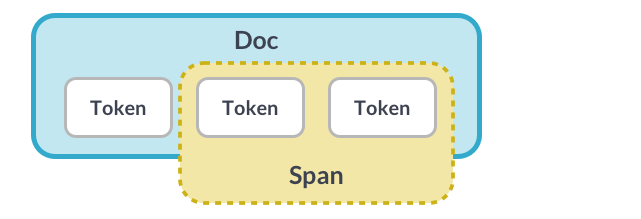

In [48]:
# a slice from the Doc is a span object
span = doc[1:3]

# get the span text via the .text attribute
print(span.text)

are learning


#### Custom Tokenizer
During processing, `spaCy` first tokenizes the text, i.e. segments it into words, punctuation and so on. This is done by applying rules specific to each language. For example, punctuation at the end of a sentence should be split off – whereas “U.K.” should remain one token. Each `Doc` consists of individual tokens, and we can iterate over them:

In [49]:
doc = nlp("Apple is looking at buying U.K. startup for $1 billion")
for token in doc:
    print(token.text, end= " | ")

Apple | is | looking | at | buying | U.K. | startup | for | $ | 1 | billion | 

First, the raw text is split on whitespace characters, similar to `text.split(' ')`. Then, the tokenizer processes the text from left to right. On each substring, it performs two checks:

1. **Does the substring match a tokenizer exception rule?** For example, “don’t” does not contain whitespace, but should be split into two tokens, “do” and “n’t”, while “U.K.” should always remain one token.
2. **Can a prefix, suffix or infix be split off?** For example punctuation like commas, periods, hyphens or quotes.
If there’s a match, the rule is applied and the tokenizer continues its loop, starting with the newly split substrings. This way, spaCy can split **complex, nested tokens** like combinations of abbreviations and multiple punctuation marks.

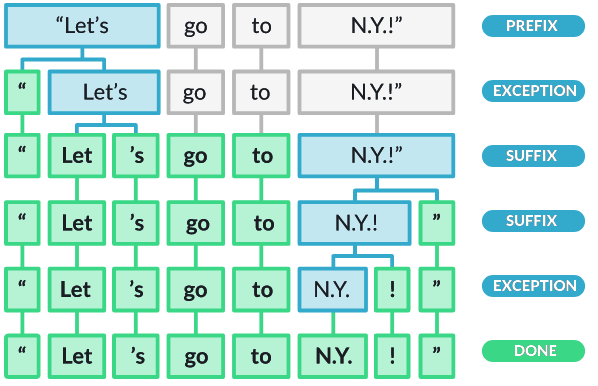

---

* **Tokenizer exception**: Special-case rule to split a string into several tokens or prevent a token from being split when punctuation rules are applied.
* **Prefix**: Character(s) at the beginning, e.g. `$`, `(`, `“`, `¿`
* **Suffix**: Character(s) at the end, e.g. `km`, `)`, `”`, `!`
* **Infix**: Character(s) in between, e.g. `-`, `--`, `/`, `…`.

---
However, it may return wrong tokens because since it splits on hash signs, hyphens, and underscores:

In [50]:
string = "@afi1289: provide high-quality data #textpreprocessing #data-quality. _url_ ;-) 📌🏆"
doc2 = nlp(string)

for token in doc2:
    print(token.text)

@afi1289
:
provide
high
-
quality
data
#
textpreprocessing
#
data
-
quality
.
_
url
_
;-)
📌
🏆


In `spaCy`, we can create our own tokenizer with our own customized rules. For example, if we want to create a tokenizer for a new language, this can be done by defining a new tokenizer method and adding rules of tokenizing to that method. These rules are prefix searches, infix searches, postfix searches, URL searches, and defining special cases.

Let's cutomize `spaCy` tokenizer with inividual rules for prefix, suffix, and infix. The following function creates a tokenizer object by dropping some patterns from `spaCy`'s rules (minimum modification):
> **NOTE:** Be careful with tokenizer customization because changing some rules for a specific case can affect tokenization in other cases. Errors made in this phase will propogate into later phases and cause problems. 

---
* Check out the following link for more about adding special rules, debugging tokenizer, and customization [Tokenization](https://spacy.io/usage/linguistic-features#custom-tokenizer)

In [51]:
from spacy.tokenizer import Tokenizer
from spacy.util import compile_prefix_regex, \
                       compile_infix_regex, compile_suffix_regex

# customize your spaCy tokenizer
def custom_tokenizer(nlp):
    
    # use default patterns except the ones matched by re.search
    prefixes = [pattern for pattern in nlp.Defaults.prefixes 
                if pattern not in ['-', '_', '#']]
    suffixes = [pattern for pattern in nlp.Defaults.suffixes
                if pattern not in ['_']]
    infixes  = [pattern for pattern in nlp.Defaults.infixes
                if not re.search(pattern, 'xx-xx')]

    return Tokenizer(vocab          = nlp.vocab, 
                     rules          = nlp.Defaults.tokenizer_exceptions,
                     prefix_search  = compile_prefix_regex(prefixes).search,
                     suffix_search  = compile_suffix_regex(suffixes).search,
                     infix_finditer = compile_infix_regex(infixes).finditer,
                     token_match    = nlp.Defaults.token_match)

In [52]:
# change the behaviour of nlp tokenizer
nlp.tokenizer = custom_tokenizer(nlp)

# create a Doc by processing a string of text with the nlp object
doc = nlp(string)

# iterate over tokens in Doc
for token in doc:
    print(token.text)

@afi1289
:
provide
high-quality
data
#textpreprocessing
#data-quality
.
_url_
;-)
📌
🏆


To apply `spaCy` tokenizer or your custom tokenizer on a column in dataframe, we will use pandas `.apply()` function:
> **NOTE**: `nlp` by default runs the entire `spaCy` pipeline, which includes part-of-speech tagging, parsing and named entity recognition. You can significantly **speed up your code** by using `nlp.tokenizer(x)` instead of `nlp(x)`, or by disabling unneccesary parts of the pipeline when you load the model. E.g. `nlp = spacy.load("en_core_web_sm",  
                 disable=["tok2vec", "tagger", "parser", "attribute_ruler", "lemmatizer", "ner"])`

In [53]:
# load a pipeline package by name and return nlp object
nlp = spacy.load("en_core_web_sm")

# select a subset from reddit dataframe
sub_reddit = df_reddit[["id","title", "clean_text_textacy"]][:100]

# tokenize clean text column 
sub_reddit["tokens"] = sub_reddit["clean_text_textacy"].apply(lambda x: [t.text for t in nlp.tokenizer(x)])

#### Stop Words Removal
Stop words refer to agroup of words tha occur frequently in natural languages and add little or no meaning to the overall sentence (e.g., `the`, `to`, and `of`). Such words are often removed before analysis or modelling. Most of NLP libraries provide stop words lists. We will work with `spaCy`s to discared stop words here.
> **NOTE:** Removing stop words may be a Dangerous in some NLP tasks since it will change the semantics of a text. For example, if you filter stop words with `spaCy` from "I didn't like this movie", you will have "like this movie"! For sentiment analyis task, you've changed the sentiment polarity calssification from negative to positive!

`spaCy` has a list of 326 stop words. Let's check them:

In [54]:
# show the current set of stop words in spaCy
stopwords = nlp.Defaults.stop_words
print(len(stopwords))
print(stopwords)

326
{'‘d', 'he', 'just', 'somewhere', 'sixty', 'keep', 'who', 'namely', 'his', 'them', 'these', 'around', 'whither', 'herself', '’ve', 'perhaps', 'my', 'what', 'move', 'before', 'now', 'former', 'several', 'whom', 'same', 'third', 'that', 'afterwards', 'please', 'where', 'whose', 'one', 'whence', 'anywhere', 'except', 'however', 'amount', 'besides', 'everyone', 'due', 'bottom', 'ca', 'should', 'this', 'noone', 'give', 'another', 'n‘t', 'might', 'throughout', 'so', 'those', 'few', 'cannot', 'nowhere', 'as', 'would', 'done', 'with', 'she', 'become', 'and', 'mine', 'each', 're', 'between', 'name', 'becomes', 'or', 'can', "'ll", 'top', 'see', 'put', 'be', 'further', 'front', 'something', 'alone', 'below', 'regarding', 'themselves', 'then', "'ve", 'others', '’re', 'already', 'ourselves', 'last', 'yourselves', 'all', 'any', 'other', 'their', 'being', 'himself', '‘ve', 'its', 'do', 'no', 'every', 'there', 'not', 'elsewhere', 'among', 'somehow', 'therein', 'only', 'thereafter', 'whoever', 'cal

Sometimes, you want to add/remove **custom stop words** to the predefined stop words set. For example, if you are analyzing résumés, terms like "Experience" and "Education" should be filtered since they appear in the majority of documents:

In [55]:
# add single stop word
nlp.Defaults.stop_words.add("my_new_stopword")
# or
nlp.vocab['my_stopword'].is_stop = True

# add several stopwords at once
# | is a set operator (union)
nlp.Defaults.stop_words |= {"my_new_stopword1","my_new_stopword2",}

# remove a single stopword
nlp.Defaults.stop_words.remove("whatever")
# or
nlp.vocab['my_stopword'].is_stop = False

# remove several stopwords at once
# - is a set operator (difference)
nlp.Defaults.stop_words -= {"whatever", "whenever"}

We can check whether a word is a stop word or not by using the `is_stop` method of `spaCy`:

In [56]:
# load a pipeline package by name and return nlp object
nlp = spacy.load("en_core_web_sm")

# create a Doc by processing a string of text with the nlp object
doc4 = nlp("All things are TOO difficult before they are easy...")

# iterate over tokens in a Doc
for token in doc4:
    print(token.text, token.is_stop)

All True
things False
are True
TOO True
difficult False
before True
they True
are True
easy False
... False


Most of the tokens in the previous sentence are stop words! Using `is_stop` method, we can remove stop words (and punctuation tokens with `is_punct` method):

In [57]:
# remove stop words and punctuation tokens
non_stop = [t for t in doc4 if not t.is_stop and not t.is_punct]

# print the list after filtering it out
print(non_stop)

[things, difficult, easy]


In [58]:
# create a column of tokenized words that are NOT stop words or punctuations
sub_reddit["tokens_clean"] = sub_reddit["clean_text_textacy"].apply(lambda x: [t.text for t in nlp(x) if not t.is_stop and not t.is_punct])

#### POS filtering
The parser component in the processing pipline of `nlp` object allows assigning word types to tokens, like verb or noun. As mentioned before, `spaCy` provides two Part-of-Speech methods, namely `pos_` (simplified tag **Recommended**) and `tag_` (more detailed tag). The table below illustrates universal POS tags:

Tag | Description | Example 
------------ | ------------ | ------------
`VERB` | verb (all tenses and modus)| run, eat, runs, ate, running, eating
`ADJ` | adjective (modify nouns) | big, first, old, African
`ADP` | adposition (cover term fore prepositions and postpositions) | in, to, during
`ADV` | adverb (modify verbs or adjectives) | very, well, tomorrow, where, there
`AUX` | auxiliary (accompanies the lexical verb) | will (do), must (do), got (done)
`CCONJ` | coordinating conjunction (connects words, phrases, and clauses that are equal to each othe) | FANBOYS (for, and, nor, but, or, yet, so)
`DET` | determiner (modify nouns or noun phrases and express the reference of noun phrase in context) | a (car), my (car), this (car), which (car)
`INTJ` | interjection (a word used as an exclamation, express an emotional reaction) | a (car), my (car), this (car), which (car)
`NOUN` | common nouns only | girl, cat, tree, beauty
`NUM` | numeral | 1, one, I, IV
`PART` | particles (must be associated with another word or phrase) | ‘s
`PRON` | pronoun ( words that substitute for nouns or noun phrases) | I, you, myself, who
`PROPN` | proper noun | Ahmad, Regensburg
`PUNCT` | punctuation marks | , . ()
`SCONJ` | subordinating conjunction (word or phrase that links a dependent clause to an independent clause) | although, before, if
`SYM` | Symbol | $, ♥‿♥, 😝
`X` | anything that cannot be assigned a real POS category | xfgh pdl jklw

We can use POS tags to filter tokens in `doc` as follows:

In [59]:
# load a pipeline package by name and return nlp object
nlp = spacy.load("en_core_web_sm")

# create a Doc by processing a string of text with the nlp object
doc5 = nlp("Apple is looking at buying U.K. startup for $1 billion")

# iterate over tokens in a Doc
for token in doc5:
    print(token.text, token.pos_, end = " | ")

# filter tokens to get verbs and symbols
verbs = [token for token in doc5 if token.pos_ in ["VERB","SYM"]]

print(f"\n\nShow a list of verbs only: {verbs}")

Apple PROPN | is AUX | looking VERB | at ADP | buying VERB | U.K. PROPN | startup NOUN | for ADP | $ SYM | 1 NUM | billion NUM | 

Show a list of verbs only: [looking, buying, $]


`textacy` provide more general and powerful method for word filtering using `extract.basics.words` function, which extracts words from a document processed by `spaCy` and allows filtering by POS tag and additional token attributes:
> **NOTE**: This function returns generator object. Therefore, you can use `list()` function, list comprehension, or the unpack operator `*` to convert it to a list of `spaCy`s **token objects**.

In [60]:
import textacy

# extract words from doc object and filter the tokens
# it returns spaCy token objects
verbs2 = textacy.extract.basics.words(doc5,# doc-like object 
            filter_stops = True,           # If True, remove stop words from word list.
            filter_punct = True,           # If True, remove punctuation from word list.
            filter_nums = True,            # If True, remove number-like words (e.g. 10, “ten”) from word list.
            include_pos = ["VERB", "SYM"], # Remove words whose part-of-speech tag IS NOT in the specified tags.
            exclude_pos = None,            # Remove words whose part-of-speech tag IS in the specified tags.
            min_freq = 1)                  #  Remove words that occur in doc-like object fewer than min_freq times.

# print the returned list of token objects
print([v for v in verbs2])

# or (you should comment the previous line)
#print(*[v for v in verbs2], sep= " | ")

[looking, buying, $]


#### Extract token lemmas
`spaCy` provides `lemma_` method to assign the base forms of words. For example, the lemma of “was” is “be”, and the lemma of “rats” is “rat”. Let's extract lemmas of the following sentence:
> **NOTE**: Using lemmas is not suitable for all NLP applications. Consider the sentence "Worst movie ever!!", using the lemma "bad" instead of "worst" will change the sentiment intensity, which can harm the performance of your sentiment analysis system.

In [61]:
# load a pipeline package by name and return nlp object
nlp = spacy.load("en_core_web_sm")

# create a Doc by processing a string of text with the nlp object
doc5 = nlp("Apple is looking at buying U.K. startup for $1 billion")

# iterate over tokens in a Doc
for token in doc5:
    print(token.text, token.lemma_)

# create a list of lemmas
lemmas = [token.lemma_ for token in doc5]
print(f"\n\nShow a list of lemmas only: {lemmas}")

Apple Apple
is be
looking look
at at
buying buy
U.K. U.K.
startup startup
for for
$ $
1 1
billion billion


Show a list of lemmas only: ['Apple', 'be', 'look', 'at', 'buy', 'U.K.', 'startup', 'for', '$', '1', 'billion']


We can also textract a filtered list of lemmas based on tokens assigned with verbs and symbols POS tags:

In [62]:
# load a pipeline package by name and return nlp object
nlp = spacy.load("en_core_web_sm")

# create a Doc by processing a string of text with the nlp object
doc5 = nlp("Apple is looking at buying U.K. startup for $1 billion")

# extract lemmas for tokens assigned with VERB and SYM Part-of-Speech tags
filtered_lemmas = [token.lemma_ for token in doc5 if token.pos_ in ["VERB", "SYM"]]
print(filtered_lemmas)

['look', 'buy', '$']


More **general** function to extract a **filtered list of word lemmas** is defined by using `textacy.extract.basics.words` function:

In [63]:
def extract_lemmas(doc, **kwargs):
    
    return [t.lemma_ for t in textacy.extract.basics.words(doc, **kwargs)]

# extract lemmas from spaCys doc object for tokens assigned with ADJ, VERB, NOUN, PROPN, and SYM Part-of-Speech tags
filtered_lemmas2 = extract_lemmas(doc5, include_pos=["ADJ", "VERB", "NOUN","PROPN", "SYM"])

print(filtered_lemmas2)

['Apple', 'look', 'buy', 'U.K.', 'startup', '$']


#### Word Frequency Analysis:
Frequently used words and phrases can give us some basic understanding of the discussed topics. In this step we will **calculate** and **visualize** word frequencies. In addition, we visuaize these frequencies by different font sizes (i.e., **word clouds**). Finally we will **rank** words with TF-IDF. 

##### Word Counter:
We will use `Counter` class to count the occurrences of each word in a text. It's a container that keeps track of how many times equivalent values are added. `Counter` accepts a **list** as input. In this case, the list would be here **tokenized words** of a `doc`. `Counter` can be updated with a list of tokens of other `doc`s:

In [64]:
from collections import Counter
# load a pipeline package by name and return nlp object
nlp = spacy.load("en_core_web_sm")

# create a Doc by processing a string of text with the nlp object
doc5 = nlp("Apple is looking at buying U.K. startup for $1 billion")
doc6 = nlp("Buying Apple iPhone in U.K. for 1300$")

# put tokens TEXT in lists 
toks1 = [token.text for token in doc5]
toks2 = [token.text for token in doc6]

# create counter object
counter = Counter(toks1)
print(counter)

counter.update(toks2)
print(counter)

Counter({'Apple': 1, 'is': 1, 'looking': 1, 'at': 1, 'buying': 1, 'U.K.': 1, 'startup': 1, 'for': 1, '$': 1, '1': 1, 'billion': 1})
Counter({'Apple': 2, 'U.K.': 2, 'for': 2, '$': 2, 'is': 1, 'looking': 1, 'at': 1, 'buying': 1, 'startup': 1, '1': 1, 'billion': 1, 'Buying': 1, 'iPhone': 1, 'in': 1, '1300': 1})


In [1]:
toks1

NameError: name 'toks1' is not defined

The code below count word occurences in dataframe:

In [66]:
# instantiate counter object
counter_df = Counter()

# count tokens in column containing tokenized words where stop words and punctuations are excluded
# _ is used here to hold the result of the last executed expression in this interactive interpreter session 
_ = sub_reddit["tokens_clean"].map(counter_df.update)

print(counter_df.most_common(10))

[(' ', 612), ('car', 78), ('like', 41), ('looking', 38), ('new', 31), ('know', 26), ('  ', 25), ('good', 21), ('got', 21), ('going', 20)]


Let's transform the counter into dataframe for more convenient in any further analysis or processing using `count_words()` function, which takes the following parameters:
* `df_name`: name of the dataframe
* `column_name`: column name, where text/tokens are stored
* `preprocess`: custom text processing function for on the fly text preprocessing 
* `min_freq`: minimum fequency of tokens to be included in the result

In [67]:
from collections import Counter ###

# count words in a column of dataframe and return dataframe
def count_words(df_name, column_name, preprocess=None, min_freq=2):

    # define inner function to process tokens and update counter
    def inner_update(doc):
        tokens = doc if preprocess is None else preprocess(doc)
        counter.update(tokens) # update here is counter method

    # create counter and run through all data
    counter = Counter()
    df_name[column_name].map(inner_update) # call inner function

    # transform counter into data frame
    freq_df = pd.DataFrame.from_dict(counter, orient='index', columns=['freq'])
    # query the columns of a DataFrame with a boolean expression
    freq_df = freq_df.query('freq >= @min_freq')
    # change the index name
    freq_df.index.name = 'token'
    
    return freq_df.sort_values('freq', ascending=False)

In [68]:
# calculate the frequency of words in the precomputed "tokens_clean" column
freq_df = count_words(sub_reddit, "tokens_clean")
freq_df

freq
token          
            612
car          78
like         41
looking      38
new          31
...         ...
pictures      2
chance        2
wise          2
totally       2
autocheck     2

[861 rows x 1 columns]

In [69]:
# generate pandas series of frequencies from the "clean_text_textacy" column 
# preprocess has function to tokenize words and filter stop words and punctuations

freq_df2 = count_words(sub_reddit, 
                       "clean_text_textacy",
                      preprocess = lambda x: [t.text for t in nlp(x) if not t.is_stop and not t.is_punct])
freq_df.head(15)

freq
token           
             612
car           78
like          41
looking       38
new           31
know          26
              25
good          21
got           21
want          20
battery       20
going         20
engine        19
CUR           19
windshield    18

##### Creating Frequency Diagram:
Let's create a frequency diagram based on frequency dataframe using `Pandas` plotting API with `plotly` as backend.
> **NOTE**: If you want to control **axis labels** use `labels` argument, which accepts a dictionary that maps column names to the new, desired labels. Changing the title should not be included in this dictionary. Instead, it should be given as a separate keyword argument — `title`

---
More about using `plotly` as `pandas` plotting backend:
* [Plotly Documentation](https://plotly.com/python/pandas-backend/)
* [How to use Plotly as pandas plotting backend](https://towardsdev.com/how-to-use-plotly-as-pandas-plotting-backend-123ff5378003)

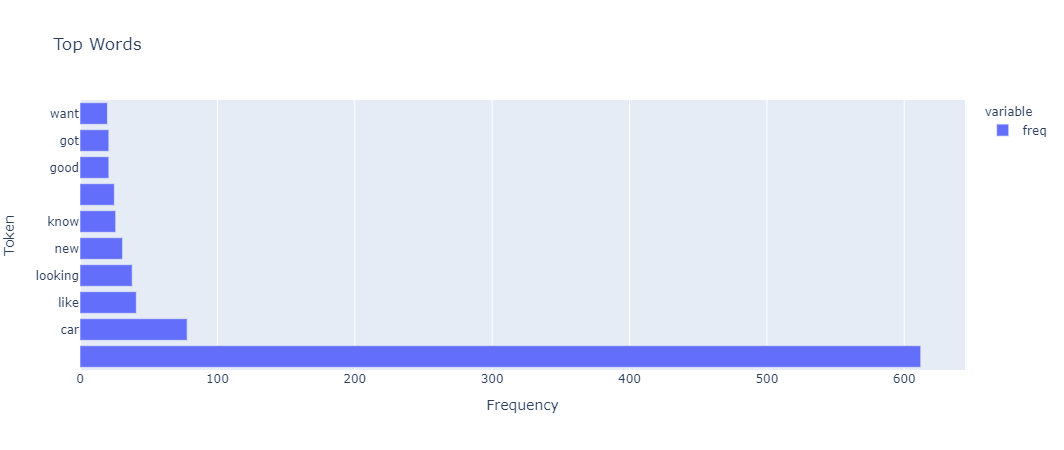

In [70]:
ax = freq_df.head(10).plot(kind="barh",
                          labels={
                              "value" : "Frequency",
                              "token":"Token"
                          },
                     title= "Top Words")
ax

We can also use `plotly.graph_object` for more customized bar plot:

---
Check `plotly` documentation to learn more about how to create and update figures: 
* [Creating and updating figures](https://plotly.com/python/creating-and-updating-figures/#figures-as-graph-objects).
* [Plotly API Reference](https://plotly.com/python-api-reference/)
* [update_layout() method](https://plotly.com/python/reference/layout/#layout-title)


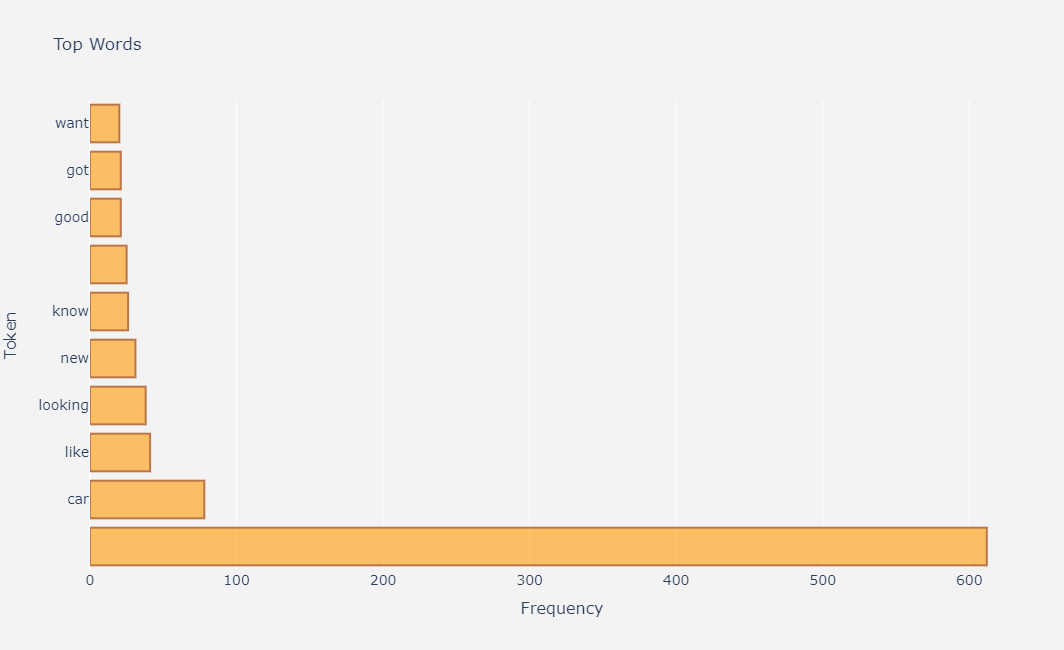

In [71]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Bar(x =  freq_df["freq"][:10],
                     y =  freq_df.index.values[:10] , 
                     orientation='h',               # horizontal bar plot
                     marker_color= '#FFA726',       # Changing color of Bars
                     marker_line_color = '#A04000', # Changing color of border
                     marker_line_width = 2,         # Changing width of border
                     opacity=0.7,                    # Changing opacity of Bars
                    )
             )

# we use update_layout() method to update multiple nested nested properties of a figure's layout
fig.update_layout(
    title='Top Words',                             # change the title
    yaxis=dict(                                    # customize yaxis
                title='Token',                    
                titlefont_size=16,
                tickfont_size=14,
                ),
   
    xaxis=dict(                                    # customize xaxis
                title='Frequency',
                titlefont_size=16,
                tickfont_size=14,
                ),
    width=970,
    height=650,
    margin=dict(                                   # set margins for left, right, bottom, and top
        l=40,
        r=30,
        b=80,
        t=100,
    ),
    paper_bgcolor='rgb(243, 243, 243)', # Sets the background color of the paper where the graph is drawn
    plot_bgcolor='rgb(243, 243, 243)',  # Sets the background color of the plotting area in-between x and y axes
    
    showlegend=False,
)

fig.show()

##### Creating Word Clouds
Word Clouds allow identifiying the keywords in a text where words. The more a specific word appears in a piece of text, the bigger and bolder it appears in the word cloud. With this, we’ll get a good idea of what a text is about before even reading it. To generate word clouds we will use `WordCloud`.
The only required argument for a `WordCloud` object is `text` or `counter`, but it has a list of optional arguments such as `max_words` (i.e., the maximum number of words) and `stopwords` (i.e., stop word list to be removed).
> Type `?WordCloud` to check all arguments

There are **three steps** to create word cloud for a single document (e.g., single tweet):
1. Extract the text document
2. Create and generate a wordcloud image
3. Display the cloud using `matplotlib` or `plotly`

(-0.5, 399.5, 199.5, -0.5)

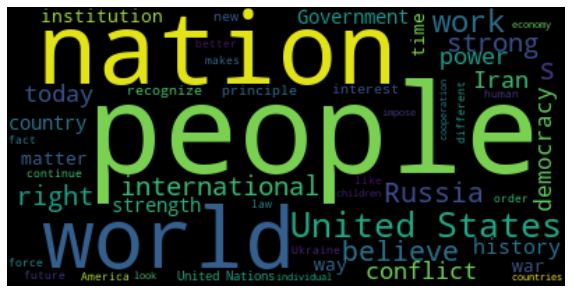

In [72]:
from wordcloud import WordCloud
from matplotlib import pyplot as plt

# 1.Extract one text document
text = df.query("year==2015 and country=='USA'")['text'].values[0]
# or
# text = df[(df["year"]== 2015) & (df["country"]== "USA")]["text"].values[0]

# 2.Create and generate a wordcloud image
wc = WordCloud(max_words=50, stopwords=stopwords)
wc.generate(text)

# 3.Display the cloud using matplotlib 
plt.figure(figsize=(10, 8)) 
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")

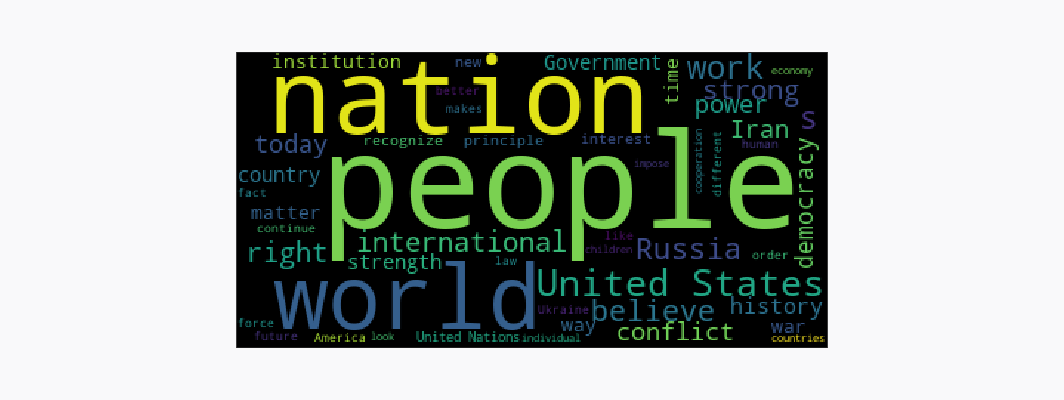

In [73]:
# using plotly
import plotly.graph_objects as go

fig = go.Figure()


fig.add_trace(go.Image(z=wc))
fig.update_layout(
    height=400,
    xaxis={"visible": False},
    yaxis={"visible": False},
    margin={"t": 0, "b": 0, "l": 0, "r": 0},
    hovermode=False,
    paper_bgcolor="#F9F9FA",
    plot_bgcolor="#F9F9FA",
)

**Important:** To generate a word cloud for a large set of documents, it is recomended to create a frequency counter first, then create a word cloud directly from frequencies using `generate_from_frequencies()`. The function in the cell below does that. It accepts the following arguments:
* `word_freq`: `pandas` Series of frequencies, we will generate it using our `word_counts()` function
* `title`: title of the word cloud
* `max_words`: maximum number of words in the cloud
* `stopwords`: a list of stop word to eliminate

In [74]:
from wordcloud import WordCloud 
from collections import Counter

def WC_generator(word_freq, title=None, max_words=200, stopwords=None):
    
    # convert data frame into dict
    if type(word_freq) == pd.Series:
        counter = Counter(word_freq.fillna(0).to_dict())
    else:
        counter = word_freq

    # filter stop words in frequency counter
    if stopwords is not None:
        counter = {token:freq for (token, freq) in counter.items() 
                              if token not in stopwords}
        
    # create wordcloud object
    wc = WordCloud(width=800, height=400, 
                   background_color= "black", colormap="Paired", 
                   max_font_size=150, max_words=max_words)
    # generate word cloud image from frequencies
    wc.generate_from_frequencies(counter)
 
    # Display the cloud using matplotlib 
    #plt.figure(figsize=(20,10))
    plt.title(title) 
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")

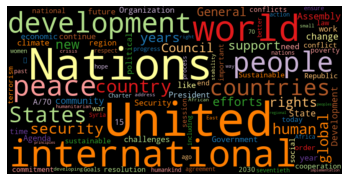

In [75]:
# generate pandas series of frequencies from the "text" column of a subset of dataframe
# preprocess has function to tokenize words and filter stop words and punctuations
freq_2015_df = count_words(df[df['year']==2015], 
                           "text", 
                           preprocess = lambda x: [t.text for t in nlp(x) if not t.is_stop and not t.is_punct])

# create a word cloud directly from frequencies using WC_generator function
WC_generator(freq_2015_df['freq'], max_words=100)

##### Ranking with TF-IDF
Visuaizing the most frequent words usually does **NOT** reveal much insight. Even if stop words are removed, the most common words are usually obvious domain-specific terms that are quite similar in any subset (slice) of the data. But we would like to give more **importance** to those words that appear more **frequently** in a **given slice** of data than "usual". Such a slice can be any subset of the corpus, e.g., a single speech, the speeches of a certain decade, or the speeches from one country.
We want to **highlight words** those actual word **frequency** in a slice is **higher** than their total probability would suggest. There is a number of algorithms to measure the "surprise" factor of a word. One of the simplest but best working approaches is *to complement* the **term frequency** with the **inverse document frequency**.

 
> * $TF(t,d)$ – Term Frequency is described as the number of times that a term $t$ occurs in a document $d$. It considers all the terms of equal importance. For example, the word *Syria* appears ten times in a document of 100 words, then the $tf$ for “Syria” is 10/100 = 0.10.
> * $TF(t, C)$ Corpus level frequency is the sum of the term frequencies across **all** documents. I like to refer to this as **overall term frequency**.
> * $df(t)$ document frequency of a term: $df(t)$ counts the number of documents $d$ in Corpus $C$ where the term $t$ is present. As we can see from this figure, the word *cent* has a document frequency of 1. Even though it appeared 3 times, it appeared 3 times in only **one** document:

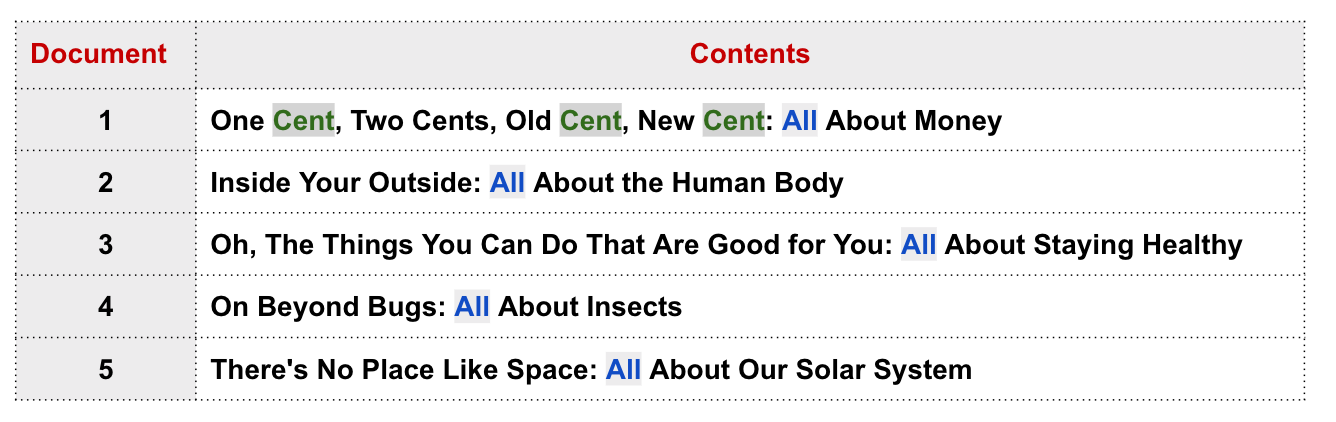


> * $IDF(t)$ inverse document frequency: It is a weighting factor to evaluate the **unusualness** of a term in a corpus. This metric can be calculated by taking the total number of documents, dividing it by the number of documents that contain a word (i.e., $df(t)$), and calculating the logarithm. $IDF(t)$ measures the informativeness of term $t$. In other words, if the word is very common and appears in many documents, this metric will approach **0**. Otherwise, it will approach **1** for rare words.
> * $TF-IDF$: is a measure to evaluate how important a word $t$ is to a document in a collection or corpus. Given a term $t$ in a document. The higher the $TF-IDF$ for $t$, the more relevant that word is in that particular document. There are many different variations of $TF-IDF$ but for now let us concentrate on the this basic version. The following figure shows the formula for calculating $TF-IDF(t, d)$ in a document: 

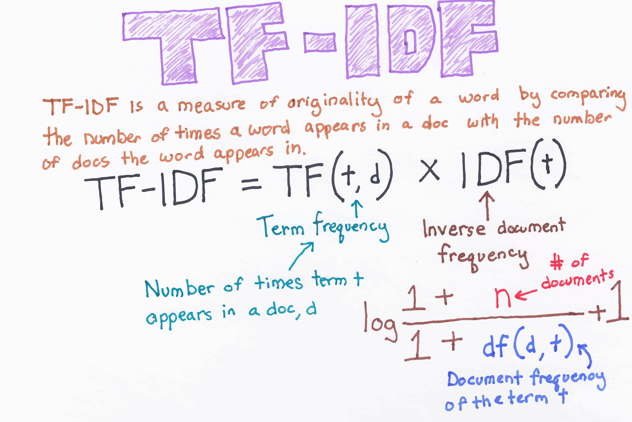

> In our case, we will compute $TF-IDF$ score to weight a term $t$ in a set of documents $D ⊆ C$ **corpus** by multiplying the overall term frequency for this subset with inverse document frequency:
    
* $TF-IDF(t, D) = TF(t, D) * IDF(T)$

> This score yields **high values** for terms appearing **frequently** in the selected document(s) $D$ but **rarely** in other documents of the corpus. You will see how TF-IDF weighted visualizations can emphasize the differences of political topics in the UN Debate dataset.

---
Read more about TF-IDF:
* [TF(Term Frequency)-IDF(Inverse Document Frequency) from scratch in python](https://towardsdatascience.com/tf-term-frequency-idf-inverse-document-frequency-from-scratch-in-python-6c2b61b78558)
* [What is Document Frequency (DF) ?](https://kavita-ganesan.com/what-is-document-frequency/#.YuE6GnZByUk)
---
 Let's define `compute_idf()` fucntion to calculate $IDF$ for all terms in the corpus. This function is very similar to `count_words()` function, except that each token is counted only once per document `counter.update(set(tokens))`, and the $IDF$ values are computed after counting. This function returns `pandas` dataframe and accepts the following parameters:
* `df_name`: name of the dataframe
* `column_name`: column name, where text/tokens are stored
* `preprocess`: custom text processing function for on the fly text preprocessing 
* `min_df`: serves as a filter for the long tail of infrequent words.

In [76]:
# compute IDF for set of documents stored in a column of dataframe
def compute_idf(df_name, column_name, preprocess=None, min_df=2):
    
    # define inner function to process tokens and update counter
    def inner_update(doc):
        tokens = doc if preprocess is None else preprocess(doc)
        counter.update(set(tokens)) # update here is counter method
                                    # each token is counted only once
    # create counter object and run through all data
    counter = Counter()
    df_name[column_name].map(inner_update) # call inner function

    # create data frame 
    idf_df = pd.DataFrame.from_dict(counter, orient='index', columns=['df'])
    
    # query the columns of a DataFrame with a boolean expression
    idf_df = idf_df.query('df >= @min_df')
    # compute idf and store it in new column of the given dataframe
    idf_df['idf'] = np.log(len(df_name)/idf_df['df'])+0.1
    # change the index name
    idf_df.index.name = 'token'
    return idf_df

Let's apply our function on the UN General Debate Corpus. The **IDF** values need to be computed **once** for the **entire corpus** and can the be used in all kinds of analysis.

In the code below we will clean `text` column in the dataframe using our `clean()` and `preproc()` functions. Then, we will create new column `tokens` based on the clean text and apply `compute_idf()` on it.
> Note that `nlp` by default runs the entire `spaCy` pipeline, which includes part-of-speech tagging, parsing and named entity recognition. You can significantly speed up your code by using `nlp.tokenizer(x)` instead of `nlp(x)`, or by **disabling unneccesary parts** of the pipeline when you load the model as follows:

In [77]:
# load a pipeline package by name and return nlp object
# disable pipeline components
nlp = spacy.load("en_core_web_sm",  
                 disable=["tok2vec", "tagger", "parser", "attribute_ruler", "lemmatizer", "ner"])

# clean the text
df["clean_text"] = df["text"].map(clean)
# preprocess the text
df["prep_text"] = df["clean_text"].map(preproc)
# create token column for further analysis
df["tokens"] = df["prep_text"].map(lambda x: [t.text for t in nlp(x) if not t.is_stop and not t.is_punct])

# create a dataframe containing the IDF values for each token in the UN General Debate dataset
idf_df = compute_idf(df, "tokens")

We can check out the result:

In [78]:
# high IDF means rare (interesting) term
idf_df

df       idf
token                          
wolves              5  7.414153
revisionists        4  7.637297
initiative       3343  0.908967
intense           374  3.099335
effect           2228  1.314732
...               ...       ...
Tatars              3  7.924979
Mobility            2  8.330444
decarbonization     2  8.330444
Shamin              2  8.330444
Baal                2  8.330444

[40401 rows x 2 columns]

To caculate $TF-IDF$ for the entire corpus, we'll calculate word counts $TF$ using our `count_words()` function by applying it on `tokens` column. Then, we multiply columns word counts with $IDF$:

In [79]:
# count words 
freq_df = count_words(df, "tokens")
freq_df

freq
token                 
               1057777
United          118024
international   106612
Nations         104125
countries        82487
...                ...
extremis             2
sting                2
pasts                2
Tartars              2
Baydhah              2

[41405 rows x 1 columns]

Since both dataframes have the **same index** (i.e., `token`), we can **join** and **multiply** them (even if the number of records is different!):

In [80]:
# join idf dataframe with frequency dataframe and multiply to get tf-idf
# join works faster for large datasets
freq_df = freq_df.join(idf_df)
freq_df['tfidf'] = freq_df['freq'] * freq_df['idf']

Using our `WC_generator()`, let's create the word clouds based on word counts (term frequencies) alone and TF-IDF scores for the speeches of years 1970 and 2015 in the corpus:

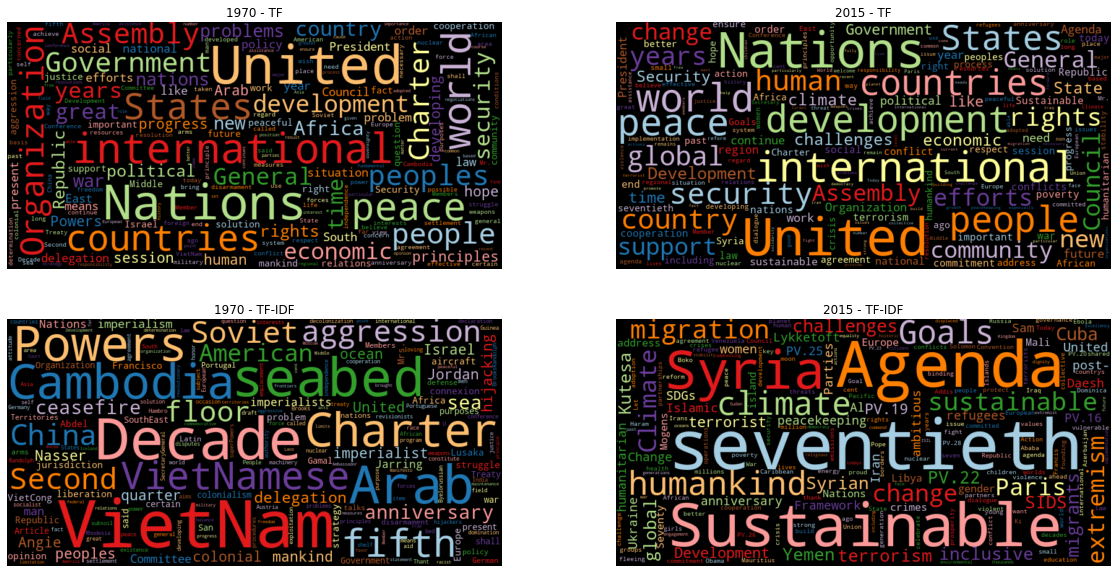

In [81]:
freq_1970 = count_words(df[df['year'] == 1970], "tokens")
freq_2015 = count_words(df[df['year'] == 2015], "tokens")

freq_1970['tfidf'] = freq_1970['freq'] * idf_df['idf']
freq_2015['tfidf'] = freq_2015['freq'] * idf_df['idf']

plt.figure(figsize=(20,10)) 
plt.subplot(2,2,1)###
# create word clouds for words weighted by plain counts for speeches in 1970 and 2015
WC_generator(freq_1970['freq'], title='1970 - TF')
plt.subplot(2,2,2)###
WC_generator(freq_2015['freq'], title='2015 - TF')

# create word clouds for words weighted by TF-IDF for speeches in 1970 and 2015
plt.subplot(2,2,3)###
WC_generator(freq_1970['tfidf'], title='1970 - TF-IDF')
plt.subplot(2,2,4)###
WC_generator(freq_2015['tfidf'], title='2015 - TF-IDF')

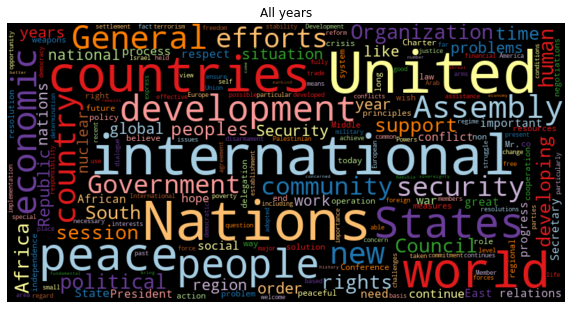

In [82]:
# create word clouds for words weighted by plain counts for speeches in over all years
plt.figure(figsize=(10,6)) 
WC_generator(freq_df['freq'], title='All years')

This figure shows the power of TF-IDF weighting. While the most common words are almost **identical** in 1970 and 2015 (and over all years), the **TF-IDF weighted visualizations** **emphasize the differences** of political topics, because this score yields **high values** for **terms** (e.g., Syria, Vietnam) appearing **frequently** in the selected documents (1970 or 2015 speeches) but **rarely** in other documents of the corpus.

#### Finding a Keyword-in-Context
Word clouds and frequency diagrams are great to visualize the summary of textual data. However, if we look at the 2015 TF-IDF word cloud, the following question might be raised:
* What is the meaning of some frequent words? Why they appear so frequently? For example, the terms "SDGs", "SIDS", and "PV" appear in the 2015 TF-IDF word cloud. What are they actually? 
To find out that, we should figure out in which context do these words appear. That is, we need to perform **Keyword-in-Context (KWIC) analysis** on the **original untokenized** text. This analysis returns a list of text fragments of equal length showing the **left and right context** of a **keyword**.

To perform KWIC analysis on a dataframe, we will create a function that extend `textacy.extract.kwic.keyword_in_context` function, which extracts keywords with their surrounding contexts from a text document using regular expressions:

> NOTE: `textacy.extract.kwic.keyword_in_context` works on a single documents. 

The function below iteratively collects the keyword context by applying the `add_kwic` function to each document with `map`. This trick, which we already used in `words_count` function is very efficient and enables KWIC analysis also for larger corpora. 
By default, the function returns a list of tuples of the form (left context, keyword, right context). If `print_samples` is greater than 0, a random sample of the results is printed. Sampling is especially useful when you work with lots of documents because the first entries of the list would otherwise stem from a single or ver small number of documents.

In [83]:
import textacy
from textacy.extract.kwic import keyword_in_context

# define KWIC function to extract keyword and corresponding context from pandas Series of textual data
def kwic(doc_series, keyword, window=35, print_samples=5):
    """
    Define inner function to use it with pandas map. This function will search for
    ``keyword`` matches in a spaCy ``doc`` or raw text via regular expression and yield matches
    along with ``window_width`` characters of context before and after occurrence. Then it will
    add the result into a list
    
    Ignore letter case in keyword matching
    """
    def add_kwic(text):
        kwic_list.extend(keyword_in_context(text, keyword, ignore_case=True, 
                              window_width=window))
    
    # create an empty list to store result
    # each element in the list is a tuple (left context, keyword, right context)
    kwic_list = []
    # apply the inner function on each element of pandas Series
    doc_series.map(add_kwic)

    # return the entire list of tuples if print_samples is empty
    if print_samples is None or print_samples==0:
        return kwic_list
    
    else:
        # choose the minimum 
        k = min(print_samples, len(kwic_list))
        # print a message
        print(f"{k} random samples out of {len(kwic_list)} " + \
              f"contexts for '{keyword}':")
        # print a sample from the list of tuples 
        # substitute newline and escape characters with space from left and right parts of tuple
        for sample in random.sample(list(kwic_list), k):
            print(re.sub(r'[\n\t]', ' ', sample[0])+'  '+ \
                  sample[1]+'  '+\
                  re.sub(r'[\n\t]', ' ', sample[2]))

The KWIC list for "Syria" is generated by this call:

In [84]:
import random 
random.seed(22) ###
kwic(df[df['year'] == 2015]['text'], 'syria', print_samples=5)

5 random samples out of 423 contexts for 'syria':
als trying to escape the crisis in   Syria  , the issue is urgent. In others, i
 Bashar Al-Assad should be part of   Syria  ’s transition is growing, yet we ca
nt incorporating all components of   Syria  n society. We also stress the impor
stence of the domestic conflict in   Syria   and its disastrous consequences. W
welcome. For more than four years,   Syria   has been synonymous with war, viol


In [85]:
kwic(df[df['year'] == 2015]['text'], 'sdgs', print_samples=5)

5 random samples out of 73 contexts for 'sdgs':
new Sustainable Development Goals (  SDGs  ) aspire to that same vision. The A
must ensure the realization of the   SDGs   in a timely manner. We hope that t
the Sustainable Development Goals (  SDGs  ) 15-29664 21/25  A/70/PV.23 01/10
, to ensure the realization of the   SDGs  . The Commonwealth of Dominica is t
le of the century. In adopting the   SDGs  , the Marshall Islands cannot affor


#### Analyzing N-grams
Just knowing that "climate" is a frequent word does **NOT** tell us too much about the topic of discussion because, for example, "climate change" and "political climate" have different meanings. Therefore, it can be helpful to extend **frequency analysis** from single words **to short sequences** of two or three words.

> There are two types of word sequences: a **Compound** (i.e., a combination of two or more words that have a specific meaning such as *earthquake*, *self-confident*, or *climate change*) and **Collocations** (i.e., words that are frequently used together such as *red carpet* or *united nations*)

In text processing, we usually work with **bigrams** (sequence of length 2), **trigrams** (length 3). **n-grams** of size 1 are **unigrams** (single words). The function below creates a set of n-grams for a sequence of tokens. Basically, most of the n-grams will contain stop words. This function build therefore n-grams and keep those **without** stop words:

In [86]:
# define a function to build a list of n-grams from with a specific length from a list of tokens
# it accepts a set of stopwords and a seperator
def ngrams(tokens, length=2, sep=' ', stopwords=set()):
    return [sep.join(ngram) for ngram in zip(*[tokens[i:] for i in range(length)])
            if len([t for t in ngram if t in stopwords])==0]

In [87]:
# load a pipeline package by name and return nlp object
nlp = spacy.load("en_core_web_sm")

# create a Doc by processing a string of text with the nlp object
doc7 = nlp("the visible manifestation of the global climate change")


# put tokens TEXT in lists 
toks3 = [token.text for token in doc7]

In [88]:
print("Bigrams:", "|".join(ngrams(toks3, 2, stopwords=stopwords))) # variable contains spaCy stopwords 
print("Trigrams:", "|".join(ngrams(toks3, 3, stopwords=stopwords)))

Bigrams: visible manifestation|global climate|climate change
Trigrams: global climate change


Let's create a column of bigrams by using `ngrams()` function on the UN General Debate dataframe with `apply()`. Then, we will use `count_words()` function to find the most frequent tokens in the bigrams column.

> **Remember**: `apply()` function allows us to pass additional parameters of the applied function (in this case `length` and `stopwords`)

In [89]:
# extend stopwords list (change it later)
stopwords |= {" "}
# create bigram column
df["bigrams"] = df["tokens"].apply(ngrams, length=2, stopwords=stopwords)

In [90]:
# find the most frequent bigrams
count_words(df, "bigrams").head(5)

freq
token                          
United Nations           102502
international community   27170
General Assembly          26656
Security Council          20626
developing countries      17938

Let's create a TF-IDF-based word cloud for bigrams in 2015. As mentioned before, we must first compute the **IDF values** for all bigram tokens in the entire corpus. Then, we calculate  **TF-IDF-weighted frequencies**  for all speeches in 2015 by multiplying bigram frequencies with IDF. 

> **NOTE**: Since both dataframes have the same index (i.e., token), we can join and multiply them (even if the number of records is different!):

In [91]:
# calculate IDF for tokens in bigrams column for the ENTIRE corpus
bi_idf_df = compute_idf(df, "bigrams", min_df=10) 


# calculate word frequencies for bigrams of speeches in 2015
bi_freq_df = count_words(df[df['year'] == 2015], 'bigrams')

# join idf dataframe with frequency dataframe and multiply to get tf-idf
# join works faster for large datasets
bi_freq_df = bi_freq_df.join(bi_idf_df)
bi_freq_df['tfidf'] = bi_freq_df['freq'] * bi_freq_df['idf']

In [92]:
bi_freq_df.head(5)

freq      df       idf       tfidf
token                                                      
United Nations           2260  7468.0  0.105209  237.771646
human rights              479  4801.0  0.547012  262.018599
Security Council          450  6035.0  0.318260  143.217029
international community   442  6474.0  0.248042  109.634459
climate change            387  1437.0  1.753278  678.518707

As we can see in the dataframe above, "climate change" was frequent bigram in 2015 speeches. However, the word "climate" might have different contexts. Let's creat word cloud for most frequent bigrams for speeches 2015 and another one for bigrams containing "climate" only. 

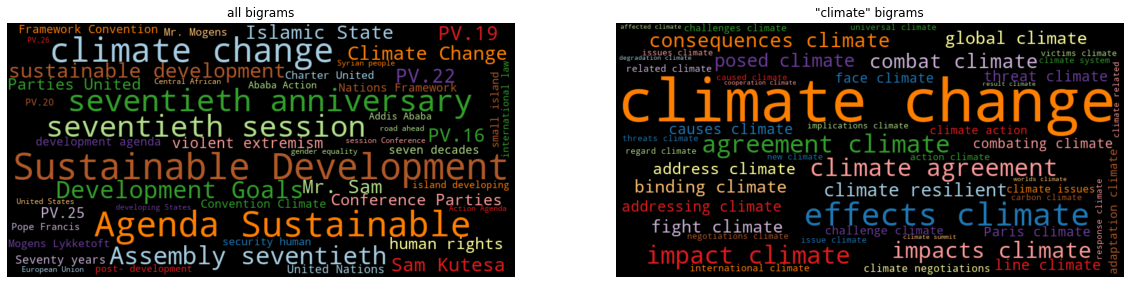

In [93]:
plt.figure(figsize=(20,10)) ###
plt.subplot(1,2,1) ###
WC_generator(bi_freq_df['tfidf'], title='all bigrams', max_words=50)

plt.subplot(1,2,2) ###
# make a filter from indices containing word climate
where = bi_freq_df.index.str.contains('climate')
# generate word cloud from the filtered dataframe
WC_generator(bi_freq_df[where]['freq'], title='"climate" bigrams', max_words=50)

#### Noun Phrases Extraction
Many of bigrams are **NOT** useful for our analysis. Let's explore another way to identify meaningful word sequences using `spaCy`s rule-based matcher, which lets you write rules to finde words and phrases in text.

* Compared to regular expressions, the **matcher** works with `Doc` and `Token` objects instead of only strings. 
* It's also more flexible: you can search for texts but also other lexical attributes. You can even write rules that use a model's predictions. For example, find the word "*duck*" only if it's a verb, not a noun.

* **Match patterns** are **lists of dictionaries**. Each dictionary describes **one** token. The **keys** are the names of token attributes, mapped to their **expected values**. In the following example, we're looking for two tokens with the text "*iPhone*" and "*X*":
    * `[{"TEXT":"iPhone"}, {"TEXT":"X"}]`
* We can also match on other token attributes. Here, we're looking for two tokens whose lowercase forms equal "*iphone*" and "*x*":
    * `[{"LOWER":"iphone"}, {"LOWER":"x"}]`
    
* We can even write patterns using attributes predicted by a model. Here, we're matching a token with the lemma "*buy*", plus a noun. The lemma is the base form, so this pattern would match phrases like "*buying milk*" or "*bought flowers*":
    * `[{"LEMMA":"buy"}, {"POS":"NOUN"}]`

Let's see how to use a pattern:

---
Read more about `spaCy` Rule-based matching:
* [Rule-based matching: Find phrases and tokens, and match entities](https://spacy.io/usage/rule-based-matching)

A Great rule-based `Matcher` by creating token patterns interactively:
* [Rule-based Matcher Explorer](https://explosion.ai/demos/matcher)

In [94]:
# 1. import the matcher
from spacy.matcher import Matcher

# 2. load the pipeline and create the nlp object
nlp = spacy.load("en_core_web_sm")

# 3. initialize the matcher with the shared vocab
matcher = Matcher(nlp.vocab)

# 4. add the pattern to the matcher using .add method
# The first argument is a unique ID to identify which pattern was matched. 
# The second argument is a LIST of patterns.
pattern = [{"TEXT":"iPhone"}, {"TEXT":"X"}]
matcher.add("APPLE_PATTERN", [pattern])

# 5. process some text
doc = nlp("Upcoming iPhone X release date leaked")

# 6. call the matcher on the doc, the result is a list of tuples 
# each tuple has the form: (match_id, start index of matched span, end index of matched span)
# BETTER:  If as_spans is set to True, a list of Span objects is returned instead.
matches = matcher(doc, as_spans=True)

# 7. iterate over matches and create a Span object (a slice of the doc at the start and end index)
print("Matches: ", [i.text for i in matches]) # or matcher(doc,as_spans=True)

Matches:  ['iPhone X']


Another examples of a more complex pattern using lexical attributes:

In [95]:
# we are looking for five tokens
pattern = [{"IS_DIGIT":True},  # first token consists of only digits
           {"LOWER":"fifa"},    #  three case-insensitive tokens
           {"LOWER":"world"},
           {"LOWER":"cup"},
           {"IS_PUNCT":True},]  # last token consist only of punctuation

# add the pattern to the matcher using .add method
matcher.add("FIFA_PATTERN", [pattern])

# process some text
doc = nlp("2022 FIFA World Cup: Spain will win!")

# call the matcher on the doc
# BETTER If as_spans is set to True, a list of Span objects is returned instead.
matches = matcher(doc, as_spans=True)


#print("Matches:", [doc[start:end].text for match_id, start, end in matches])
print("Matches:", [i.text for i in matches])

Matches: ['2022 FIFA World Cup:']


In [96]:
# we are looking for two tokens
pattern = [{"LEMMA":"love", "POS":"VERB"},  # first token is a verb with lemma love
           {"POS":"NOUN"},]                  # second token is a noun
matcher.add("LOVE_PATTERN", [pattern])

# process some text
doc = nlp("I loved dogs but now I love cats more")

# call the matcher on the doc
# BETTER If as_spans is set to True, a list of Span objects is returned instead.
matches = matcher(doc, as_spans=True)


print("Matches:", [i.text for i in matches])

Matches: ['loved dogs', 'love cats']


**Pattern matchers** have **operators and quantifiers** let you define **how often** a token should be matched. They can be added using the `OP` key.

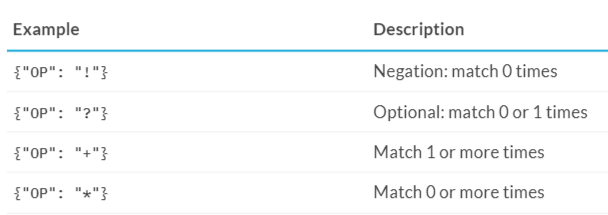

In the following example, the  `?` operator makes the determiner token optional, so it will match a token with the lemma "buy", an optional article and a noun.

In [97]:
# we are looking for the following pattern
pattern = [{"LEMMA":"buy", "POS":"VERB"},  # first token is a lemma buy
           {"POS":"DET", "OP":"?"},        # second token is an optional determiner: match 0 or 1 times
           {"POS":"NOUN"}]                 # last token is a noun
matcher.add("OPT_PATTERN", [pattern])

# process some text
doc = nlp("I bought a smartphone. Now I'm buying apps")

# call the matcher on the doc, 
# BETTER If as_spans is set to True, a list of Span objects is returned instead.
matches = matcher(doc, as_spans=True)


print("Matches:", [i.text for i in matcher(doc, as_spans=True)])

Matches: ['bought a smartphone', 'buying apps']


In [98]:
nlp = spacy.load("en_core_web_sm")
matcher = Matcher(nlp.vocab)

doc = nlp(
    "Features of the app include a beautiful design, smart search, automatic "
    "labels and optional voice responses."
)

# Write a pattern for adjective plus one or two nouns
pattern = [{"POS": "ADJ"}, {"POS": "NOUN"}, {"POS": "NOUN", "OP": "?"}]

# Add the pattern to the matcher and apply the matcher to the doc
matcher.add("ADJ_NOUN_PATTERN", [pattern])
matches = matcher(doc, as_spans=True)
print("Total matches found:", len(matches))

# Iterate over the matches and print the span text
print("Matches:", [i.text for i in matcher(doc, as_spans=True)])

Total matches found: 5
Matches: ['beautiful design', 'smart search', 'automatic labels', 'optional voice', 'optional voice responses']


**Regular expressions with Rule-based Matcher**: In some cases, only matching tokens and token attributes **isn’t** enough – for example, you might want to match different spellings of a word, without having to add a new pattern for each spelling. For example:

``
pattern = [{"TEXT": {"REGEX": "^[Uu](\.?|nited)$"}},
           {"TEXT": {"REGEX": "^[Ss](\.?|tates)$"}},
           {"LOWER": "president"}]
``
> When using the `REGEX` operator, keep in mind that it operates on **single tokens**, not the whole text. Each expression you provide will be matched on a token. If you need to match on the whole text instead, see the details on [regex matching on the whole text](https://spacy.io/usage/rule-based-matching#regex-text).

We can also use`textacy`s **pattern-based phrase extraction**. In pattern, we can use the same patterns convention as `spaCy` or patterns separated by whitespace. The code below define a pattern to extract sequences of nouns with a preceding adjective:

In [99]:
text = "My best friend Ryan Peters likes fancy adventure games."
doc = nlp(text)

patterns = [{"POS": "ADJ"}, {"POS":"NOUN","OP":"+"}] # equivalent is ["POS:ADJ POS:NOUN:+"]

spans = textacy.extract.matches.token_matches(doc, patterns=patterns)

# we use * before list comprehension to print elements without brackets
print(*[s.lemma_ for s in spans], sep='|')

good friend|fancy adventure|fancy adventure game


Let's define a function to extract word sequences based on a defined pattern from  dataframe:

In [100]:
# import the matcher
from spacy.matcher import Matcher

# load the pipeline and create the nlp object
nlp = spacy.load("en_core_web_sm")

# define rule-based matching function
def rb_match(df_name, col_name, pattern):

    # initialize the matcher with the shared vocab
    matcher = Matcher(nlp.vocab)
    # add the pattern to the matcher using .add method
    pattern_name = "PATTERN_%s" %col_name  
    matcher.add(pattern_name, [pattern])
    
    # process some text and store it in new column
    # use nlp.pipe for better performance 
    df_name['Text_spacy'] = [d for d in nlp.pipe(df_name[col_name])]
    
    # generate matches and store them in a new column
    df_name['matches'] = df_name['Text_spacy'].apply(lambda x: [i.text for i in matcher(x, as_spans=True)])    
    
    return df_name

Another alternative is to use `textacy` convenient wrapper for **pattern-based phrase extraction**:
````
import spacy
import textacy

# load the pipeline and create the nlp object
nlp = spacy.load("en_core_web_sm")

# define rule-based matching function
def rb_match(df_name, col_name, pattern):
    
    def extractor(doc, my_pattern, sep='_'):
        spans = textacy.extract.matches.token_matches(doc, patterns = pattern)
        return [sep.join([t.text for t in s]) for s in spans]
    
    # process some text and store it in new column
    # use nlp.pipe for better performance 
    df_name["Text_spacy"] = [d for d in nlp.pipe(df_name[col_name])]
    
    # call the extractor on the doc, the result is a list of tuples
    df_name["matches"] = df_name["Text_spacy"].apply(extractor, my_pattern=pattern)
    
    
    return df_name
````

Now, we can apply `rb_match` function on a simple dataframe for testing:

In [101]:
details = {
    'Text_id' : [23, 21, 22, 21],
    'Text' : ['All roads lead to Rome. As laughter increases, respect decreases', 
              'All work and no play makes Jack a dull buy', 
              'Any port in a storm', 
              'Avoid a questioner, for he is also a tattler'],
}
  
# creating a Dataframe object 
example_df = pd.DataFrame(details)

rb_match(example_df, "Text", [{"POS":"NOUN"},{"POS":"VERB", "OP":"+"}])

Text_id                                                              Text  \
0       23  All roads lead to Rome. As laughter increases, respect decreases   
1       21                        All work and no play makes Jack a dull buy   
2       22                                               Any port in a storm   
3       21                      Avoid a questioner, for he is also a tattler   

                                                                        Text_spacy  \
0  (All, roads, lead, to, Rome, ., As, laughter, increases, ,, respect, decreases)   
1                            (All, work, and, no, play, makes, Jack, a, dull, buy)   
2                                                        (Any, port, in, a, storm)   
3                         (Avoid, a, questioner, ,, for, he, is, also, a, tattler)   

                           matches  
0  [roads lead, respect decreases]  
1                     [play makes]  
2                               []  
3                               []

For defining a comprehensive function, we will define another function to **extract noun phrases based on POS patterns**. This function `extract_noun_phrases` takes the following arguments:
* `doc` object
* `preceding_pos` a list of POS tags
* `sep` a separator character to join the words of the noun phrase
The constructed pattern searches for sequences of **nouns** that are **preceded** by with one the specified POS tags (give by `preceding_pos` argument). The result are token lemmas.

> **NOTE**: `[{"POS": "ADJ"}, {"POS":"NOUN","OP":"+"}]` is equavilant with `["POS:ADJ POS:NOUN:+"]`

In [102]:
def extract_noun_phrases(doc, preceding_pos=['NOUN'], sep='_'):
    patterns = []
    for pos in preceding_pos:
        patterns.append([{"POS":pos}, {"POS":"NOUN", "OP":"+"}])
        # or
        #patterns.append(f"POS:{pos} POS:NOUN:+")

    spans = textacy.extract.matches.token_matches(doc, patterns=patterns)

    return [sep.join([t.lemma_ for t in s]) for s in spans]

In the following example, we extract all phrases consisting of an adjective or a noun followed by a sequence of nouns:

In [103]:
text = "My best friend Ryan Peters likes fancy adventure games."
doc = nlp(text)

# extract adjective followed by one or more nouns
# or a noun followed by one or more nouns
print(*extract_noun_phrases(doc, ['ADJ', 'NOUN']), sep='|')

good_friend|fancy_adventure|fancy_adventure_game|adventure_game


#### Named-Entity Recognition (NER)
NER is the process of labelling “real-world” objects, like persons, companies or locations in text. spaCy can recognize various types of named entities in a document, by asking the model for a prediction. Named entities are available as the `ents` property of a `Doc`:

In [104]:
# load the pipeline and create the nlp object
nlp = spacy.load("en_core_web_sm")
doc = nlp("Apple is looking at buying U.K. startup for $1 billion")

print("Entities: ", [(e.text, e.start_char, e.end_char, e.label_) for e in doc.ents])

Entities:  [('Apple', 0, 5, 'ORG'), ('U.K.', 27, 31, 'GPE'), ('$1 billion', 44, 54, 'MONEY')]


The `displaCy`  visualizer lets you explore an entity recognition model’s behavior interactively. If you’re training a model, it’s very useful to run the visualization yourself. To help you do that, spaCy comes with a visualization module. You can pass a `Doc` or a list of `Doc` objects to displaCy and run `displacy.serve` to run the web server, or `displacy.render` to generate the raw markup:

> **NOTE**: Because `spaCy` models are statistical and strongly depend on the examples they were trained on, this **doesn’t** always work perfectly and might need some tuning later, depending on your use case.

In [105]:
from spacy import displacy

text = "When Ahmad Alismail started working on NLP projects at xax managing information & data, few people outside of the company took him seriously."

# load the pipeline and create the nlp object
nlp = spacy.load("en_core_web_sm")
doc = nlp(text)

displacy.render(doc, style="ent")

To extract named-entites of a certain types from dataframe, let's define a functin that make use of `textacy.extract.entities` function:

> **Important**: Here, We use this function with `apply` on a column containing `spaCy` documents. Be sure to process the text using `nlp` pipeline object before applying `extract_entities` function in this way.

In [106]:
def extract_entities(doc, include_types=None, sep='_'):

    ents = textacy.extract.entities(doc, 
             include_types=include_types, 
             exclude_types=None, 
             drop_determiners=True, 
             min_freq=1)
    
    return [sep.join([t.lemma_ for t in e])+'/'+e.label_ for e in ents]

In [107]:
# create new column containing PERSON and Geo-Political entities
example_df["NER"] = example_df["Text_spacy"].apply(extract_entities, ["PERSON", "GPE"])
example_df

Text_id                                                              Text  \
0       23  All roads lead to Rome. As laughter increases, respect decreases   
1       21                        All work and no play makes Jack a dull buy   
2       22                                               Any port in a storm   
3       21                      Avoid a questioner, for he is also a tattler   

                                                                        Text_spacy  \
0  (All, roads, lead, to, Rome, ., As, laughter, increases, ,, respect, decreases)   
1                            (All, work, and, no, play, makes, Jack, a, dull, buy)   
2                                                        (Any, port, in, a, storm)   
3                         (Avoid, a, questioner, ,, for, he, is, also, a, tattler)   

                           matches            NER  
0  [roads lead, respect decreases]     [Rome/GPE]  
1                     [play makes]  [Jack/PERSON]  
2                               []             []  
3                               []             []

#### Creating one Function to Get It All
Let's combine all extraction functions defined previously in one comprehensive function. It neatly puts everything we want to extract in one place in the code so that the subsequent steps do **not** need to be adjusted if you add or change something here:
> This comprehensive function takes `Doc` object as input, because all inner functions take `Doc` as well

In [108]:
def extract_nlp(doc):
    return {
    'lemmas'          : extract_lemmas(doc, 
                                     exclude_pos = ['PART', 'PUNCT', 
                                        'DET', 'PRON', 'SYM', 'SPACE'],
                                     filter_stops = False),
    'adjs_verbs'      : extract_lemmas(doc, include_pos = ['ADJ', 'VERB']),
    'nouns'           : extract_lemmas(doc, include_pos = ['NOUN', 'PROPN']),
    'noun_phrases'    : extract_noun_phrases(doc, ['NOUN']),
    'adj_noun_phrases': extract_noun_phrases(doc, ['ADJ']),
    'entities'        : extract_entities(doc, ['PERSON', 'ORG', 'GPE', 'LOC'])
    }

In [109]:
nlp = spacy.load('en_core_web_sm')

In [110]:
text = "My best friend Ryan Peters likes fancy adventure games."
doc = nlp(text)
for col, values in extract_nlp(doc).items():
    print(f"{col}: {values}")

lemmas: ['good', 'friend', 'Ryan', 'Peters', 'like', 'fancy', 'adventure', 'game']
adjs_verbs: ['good', 'like', 'fancy']
nouns: ['friend', 'Ryan', 'Peters', 'adventure', 'game']
noun_phrases: ['adventure_game']
adj_noun_phrases: ['good_friend', 'fancy_adventure', 'fancy_adventure_game']
entities: ['Ryan_Peters/PERSON']


In [111]:
nlp_columns = list(extract_nlp(nlp.make_doc('')).keys())
print(nlp_columns)

['lemmas', 'adjs_verbs', 'nouns', 'noun_phrases', 'adj_noun_phrases', 'entities']


### Feature Extraction on a Large Dataset

#### Enable GPU
`spaCy`s neural models benefit from running on GPU. Thus, we try to load the model on the GPU when we deal large datasets:

In [112]:
if spacy.prefer_gpu():
    print("Working on GPU")
else:
    print("No GPU found")

No GPU found


#### Disable unneccesary components of Pipeline
As mentioned before, `nlp` by default runs the entire `spaCy` pipeline, which includes part-of-speech tagging, parsing and named entity recognition. We can significantly improve the runtime by by **disabling unneccesary parts** of the pipeline when you load the model as follows:

In [113]:
# load the pipeline without tok2vec component and create the nlp object
nlp = spacy.load("en_core_web_sm", disable=["tok2vec"])

#### Using `spaCy`s batch processing `nlp.pipe()`

When processing large volumes of text, it is recommended to use `spaCy`s batch processing for a significant performance gain. The function `nlp.pipeline` takes an *iterable of texts*, *processes* them internally as batch, and *yields* a list fo processed `Doc` objects in the same order as the input data.

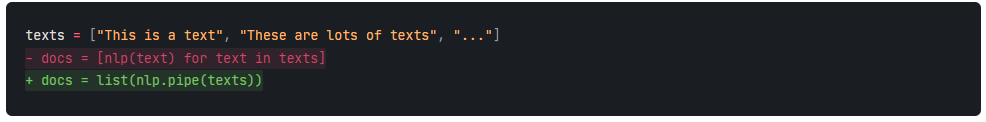


> **NOTE**: In any case, it is helpful to watch the progress and get a runtime estimate. The `tqdm` ibrary is a great tool for that purpose because it provides progress bars for iterators and dataframe operations.

---
Check `spaCy` documentation for more information about `nlp.pipe()`:
* [Language Processing Pipelines](https://spacy.io/usage/processing-pipelines)

---

To use `nlp.pipeline`, we **first** have to define a batch size. **Then** we can loop over the batches and call `nlp.pipe`. In the inner loop we **extract** the features from the processed `doc` and **write** the values back into the dataframe. :

In [114]:
import math 
from tqdm import tqdm

# define batch size
batch_size = 50
# define number of batches
batches = math.ceil(len(df) / batch_size) ###

# loop over batches, step size is equal to batch size
for i in tqdm(range(0, len(df), batch_size), total=batches):
    docs = nlp.pipe(df['clean_text'][i:i+batch_size])
    
    for j, doc in enumerate(docs):
        for col, values in extract_nlp(doc).items():
            df[col].iloc[i+j] = values

  0%|          | 0/151 [00:40<?, ?it/s]


KeyError: 'lemmas'